In [2]:
# import os
# import random
# import numpy as np
# import torch
# from experiment_builder import ExperimentBuilder
# #from model_architectures import ConvolutionalNetwork
# from model_architectures import LBC
# #dirr='/run/media/s1883226/Seagate Backup Plus Drive/v/samples/novel.domain.transfer/test'
# E='novel.target.domain.line.type'
# E1='normal'
# E2='2'
# dirr='/Users/sofiadunlosky/Downloads/samples/'+E+'/test'
# name=os.listdir(dirr)
# data_path=(dirr+'/')
# #model_dir='/run/media/s1883226/Seagate Backup Plus Drive/mlp/models/train_model_0'
# #model_dir='/Users/sofiadunlosky/Downloads/train_model_55.dms'
# #E1='lbc'
# model_dir='/Users/sofiadunlosky/Downloads/models_visual_analogy/'+E1+'_exp'+E2+'_best_model'

In [73]:
# a1=np.zeros((len(name),3))  
# for i in range (0,len(name)):
#     a=np.load(data_path+name[i])
#     a2=a['relation_structure']

In [166]:
#label_name(name)

array([[6., 1., 1.],
       [6., 4., 1.],
       [7., 3., 4.],
       ...,
       [7., 2., 2.],
       [7., 5., 3.],
       [7., 1., 3.]])

In [2]:
a1=np.zeros((len(name),3))
def label_name(name):   
    a1=np.zeros((len(name),3))
    for i in range (0,len(name)):
        a=np.load(data_path+name[i])
        if a['relation_structure'][0][0]==b'type':
            a1[i,0]=1
        if a['relation_structure'][0][0]==b'size':
            a1[i,0]=2
        if a['relation_structure'][0][0]==b'position':
            a1[i,0]=3
        if a['relation_structure'][0][0]==b'color':
            a1[i,0]=4
        if a['relation_structure'][0][0]==b'number':
            a1[i,0]=5
        if a['relation_structure'][0][0]==b'line':
            a1[i,0]=6
        if a['relation_structure'][0][0]==b'shape':
            a1[i,0]=7
        if a['relation_structure'][0][1]==b'type':
            a1[i,1]=1
        if a['relation_structure'][0][1]==b'size':
            a1[i,1]=2
        if a['relation_structure'][0][1]==b'position':
            a1[i,1]=3
        if a['relation_structure'][0][1]==b'color':
            a1[i,1]=4
        if a['relation_structure'][0][1]==b'number':
            a1[i,1]=5
        if a['relation_structure'][0][1]==b'line':
            a1[i,1]=6
        if a['relation_structure'][0][1]==b'shape':
            a1[i,1]=7
        if a['relation_structure'][0][2]==b'AND':
            a1[i,2]=1
        if a['relation_structure'][0][2]==b'OR':
            a1[i,2]=2
        if a['relation_structure'][0][2]==b'progression':
            a1[i,2]=3
        if a['relation_structure'][0][2]==b'XOR':
            a1[i,2]=4
    return a1

In [4]:
    def run_evaluation_iter(x):
        """
        Receives the inputs and targets for the model and runs an evaluation iterations. Returns loss and accuracy metrics.
        :param x: The inputs to the model. A numpy array of shape batch_size, channels, height, width
        :param y: The targets for the model. A numpy array of shape batch_size, num_classes
        :return: the loss and accuracy for this batch
        """
        #self.eval()  # sets the system to validation mode
        #if len(y.shape) > 1:
        #    y = np.argmax(y, axis=1)  # convert one hot encoded labels to single integer labels
        if type(x) is np.ndarray:
            #self.device = torch.device('cpu')
            #x= torch.Tensor(x).float().to(device=self.device)  # convert data to pytorch tensors and send to the computation device
            x= torch.Tensor(x).float().to(device=torch.device('cpu'))
        #x = x.to(self.device)
        x = x.to(torch.device('cpu'))
        #y = y.to(self.device)
        out = experiment.model.forward(x)  # forward the data in the model
        #loss = F.cross_entropy(out, y)  # compute loss
        #_, predicted = torch.max(out.data, 1)  # get argmax of predictions
        #accuracy = np.mean(list(predicted.eq(y.data).cpu()))  # compute accuracy
        return out

In [5]:
inputs=np.zeros((100,9,80,80))
for i in range (1,100):
    a=np.load(data_path+name[i])
    inputs[i,:,:,:]=a['inputs']
    #relation.append(a['relation_structure'])
test =	{
  "inputs": inputs,
  #"targets": targets,
  #"relation": relation
}
labc = LBC([100,9,80,80], dim_reduction_type = None, num_filters = 32, num_layers = 4, use_bias=True, rnn_hidden_units = 64, num_rnn_layers = 1, learning_rate = 1e-4, stride = 2, padding = 0, num_questions = 4, num_panels=9)
experiment = ExperimentBuilder(network_model=labc,
                                    experiment_name='1',
                                    num_epochs=1,
                                    #num_epochs=2,
                                    weight_decay_coefficient=0.01,
                                    use_gpu=False,
                                    continue_from_epoch=-1,
                                    train_data=test, val_data=test,
                                    test_data=test,learning_rate=0.0001, gpu_id=None)

Building basic block of LBC using input shape [100, 9, 80, 80]
Actual shape accepted for CNN: (900, 1, 80, 80)
torch.Size([900, 32, 39, 39])
torch.Size([900, 32, 19, 19])
torch.Size([900, 32, 9, 9])
torch.Size([900, 32, 4, 4])
shape after CNN torch.Size([900, 32, 4, 4])
shape before RNN torch.Size([400, 6, 512])
shape after RNN torch.Size([100, 4, 64])
Block is built, output volume is torch.Size([100, 4])
use CPU
/Volumes/DISK_IMG/models/1 /Volumes/DISK_IMG/models/1/result_outputs


/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/torch/nn/modules/rnn.py:46: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [6]:
# #labc
# def lbc_data_run(name):
#     d=np.zeros((int(len(name)/100*100/2),64))
#     for k in range (0,int(len(name)/100/2)):
#         inputs=np.zeros((100,9,80,80))
#         relation=[]
#         for i in range (1,100):
#             a=np.load(data_path+name[k*100+i+1500])
#             inputs[i,:,:,:]=a['inputs']
#             relation.append(a['relation_structure'])
#         test =	{
#           "inputs": inputs,
#           #"targets": targets,
#           #"relation": relation
#         }
#         labc = LBC([100,9,80,80], dim_reduction_type = None, num_filters = 32, num_layers = 4, use_bias=True, rnn_hidden_units = 64, num_rnn_layers = 1, learning_rate = 1e-4, stride = 2, padding = 0, num_questions = 4, num_panels=9)
#         experiment = ExperimentBuilder(network_model=labc,
#                                             experiment_name='1',
#                                             num_epochs=1,
#                                             #num_epochs=2,
#                                             weight_decay_coefficient=0.01,
#                                             use_gpu=False,
#                                             continue_from_epoch=-1,
#                                             train_data=test, val_data=test,
#                                             test_data=test,learning_rate=0.0001, gpu_id=None)

#         state = torch.load(model_dir,map_location='cpu')
#         labc.parameters=state['network']
#         model = torch.nn.DataParallel(labc)
#         X=test['inputs']
#         #y=targets
#         a=run_evaluation_iter(X)
#         #a.detach().numpy().shape
#         b=a[0].detach().numpy()
#         c=b[0::4,4,:]
#         d[(k)*100:(k)*100+100,:]=c
#     return d

In [45]:
#do not distinguish test data type
def data_run(name,model_dir):
    d=np.zeros((int(len(name)/100*100),64))
    for k in range (0,int(len(name)/100)):
        inputs=np.zeros((100,9,80,80))
        relation=[]
        for i in range (1,100):
            a=np.load(data_path+name[k*100+i])
            inputs[i,:,:,:]=a['inputs']
            relation.append(a['relation_structure'])
        test =	{
          "inputs": inputs,
          #"targets": targets,
          #"relation": relation
        }
        labc = LBC([100,9,80,80], dim_reduction_type = None, num_filters = 32, num_layers = 4, use_bias=True, rnn_hidden_units = 64, num_rnn_layers = 1, learning_rate = 1e-4, stride = 2, padding = 0, num_questions = 4, num_panels=9)
        experiment = ExperimentBuilder(network_model=labc,
                                            experiment_name='1',
                                            num_epochs=1,
                                            #num_epochs=2,
                                            weight_decay_coefficient=0.01,
                                            use_gpu=False,
                                            continue_from_epoch=-1,
                                            train_data=test, val_data=test,
                                            test_data=test,learning_rate=0.0001, gpu_id=None)

        state = torch.load(model_dir,map_location='cpu')
        labc.parameters=state['network']
        model = torch.nn.DataParallel(labc)
        X=test['inputs']
        #y=targets
        a=run_evaluation_iter(X)
        #a.detach().numpy().shape
        b=a[0].detach().numpy()
        c=b[0::4,4,:]
        d[(k)*100:(k)*100+100,:]=c
    return d

In [25]:
index1, value=np.where(t==0)
index2, value=np.where(t==1)

In [15]:
index2.shape

(1500,)

In [3]:
from sklearn.manifold import TSNE
def tsne_plot(d,a1,w):
    tsne = TSNE(n_components=2)
    tsne.fit(d)
    d_1=tsne.fit_transform(d)
    #pca.fit(d[index2])
    #d_2=pca.transform(d[index2])
    from matplotlib import pyplot as plt
    #plt.subplot(1,2,1)
    plt.figure(figsize=[20,10])
    for i in range (1,8):
        for j in range (1,8):
            for r in range (1,5):
                if i==1:
                    l1='type'
                if i==2:
                    l1='size'
                if i==3:
                    l1='position'
                if i==4:
                    l1='color'
                if i==5:
                    l1='number'
                if i==6:
                    l1='line'
                if i==7:
                    l1='shape'
                if j==1:
                    l2='type'
                    if i==6:
                        if r==1:
                            c='wheat'
                        if r==2:
                            c='green'
                        if r==3:
                            c='blue'
                        if r==4:
                            c='pink'
                    if i==7:
                        if r==1:
                            c='yellow'
                        if r==2:
                            c='lime'
                        if r==3:
                            c='steelblue'
                        if r==4:
                            c='orangered'
                if j==2:
                    l2='size'
                    if i==6:
                        if r==1:
                            c='sand'
                        if r==2:
                            c='lightpeagreen'
                        if r==3:
                            c='lightblue'
                        if r==4:
                            c='hotpink'
                    if i==7:
                        if r==1:
                            c='beige'
                        if r==2:
                            c='yellowgreen'
                        if r==3:
                            c='aqua'
                        if r==4:
                            c='darkred'
                if j==3:
                    l2='position'
                    if i==6:
                        if r==1:
                            c='lightyellow'
                        if r==2:
                            c='kermitgreen'
                        if r==3:
                            c='blueblue'
                        if r==4:
                            c='deeppink'
                    if i==7:
                        if r==1:
                            c='yellow'
                        if r==2:
                            c='seagreen'
                        if r==3:
                            c='teal'
                        if r==4:
                            c='indianred'
                if j==4:
                    l2='color'
                    if i==6:
                        if r==1:
                            c='wheat'
                        if r==2:
                            c='green'
                        if r==3:
                            c='lightskyblue'
                        if r==4:
                            c='coral'
                    if i==7:
                        if r==1:
                            c='oldlace'
                        if r==2:
                            c='springgreen'
                        if r==3:
                            c='darkcyan'
                        if r==4:
                            c='red'
                if j==5:
                    l2='number'
                    if i==6:
                        if r==1:
                            c='mastardyellow'
                        if r==2:
                            c='moss'
                        if r==3:
                            c='royal'
                        if r==4:
                            c='cerise'
                    if i==7:
                        if r==1:
                            c='gole'
                        if r==2:
                            c='apple'
                        if r==3:
                            c='lightblue'
                        if r==4:
                            c='ruby'
                if j==6:
                    l2='line'
                    if i==6:
                        if r==1:
                            c='babypoo'
                        if r==2:
                            c='grass'
                        if r==3:
                            c='darkroyalblue'
                        if r==4:
                            c='pinky'
                    if i==7:
                        if r==1:
                            c='babypoop'
                        if r==2:
                            c='teagreen'
                        if r==3:
                            c='strongblue'
                        if r==4:
                            c='rosypink'
                if j==7:
                    l2='shape'
                    if i==6:
                        if r==1:
                            c='dullyellow'
                        if r==2:
                            c='sagegreen'
                        if r==3:
                            c='deepblue'
                        if r==4:
                            c='applegreen'
                    if i==7:
                        if r==1:
                            c='sandyyellow'
                        if r==2:
                            c='palelightgreen'
                        if r==3:
                            c='lightroyalblue'
                        if r==4:
                            c='mutedpink'
                if r==1:
                    l3='and'
                if r==2:
                    l3='or'
                if r==3:
                    l3='progression'
                if r==4:
                    l3='xor'
                l=str(l1)+'_'+str(l2)+'_'+str(l3)
                f=(np.array(a1[:,:]==[i,j,r]).sum(axis=1)==3)            
                if f.sum()>0:
                    #print(i,j,r)
                    plt.scatter(d_1[:,0][np.array(a1[:,:]==[i,j,r]).sum(axis=1)==3],d_1[:,1][np.array(a1[:,:]==[i,j,r]).sum(axis=1)==3],label=l,color=c)
    plt.legend(loc=1, ncol=7)
    plt.title('TSNE '+w)
    plt.xlabel('component_0')
    plt.ylabel('component_1')
    plt.show()
    plt.savefig(w+'.png')

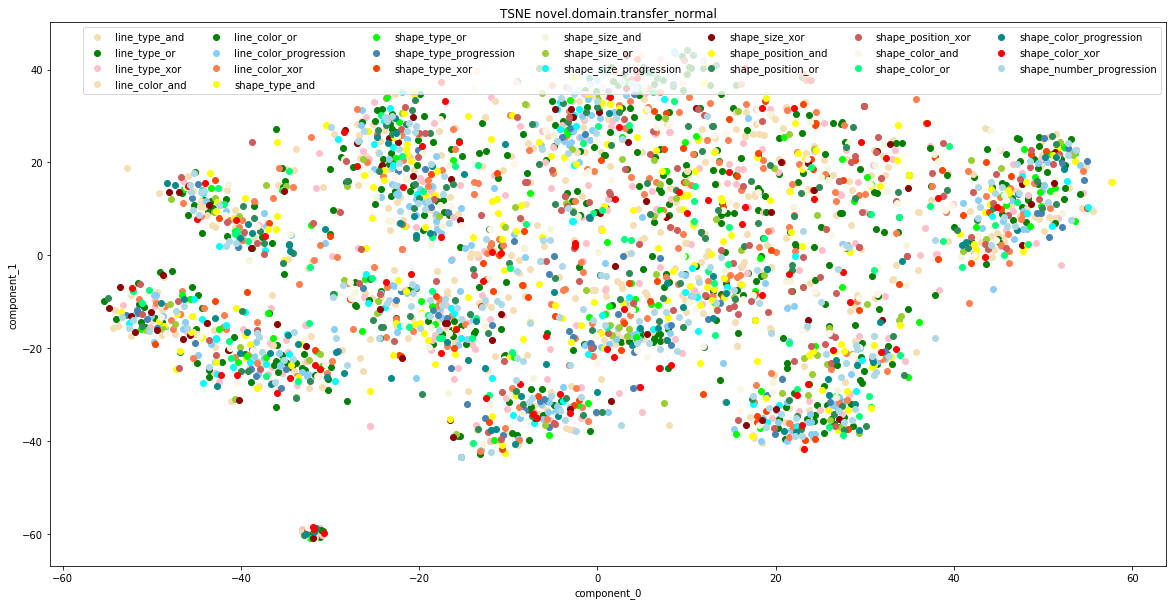

<Figure size 432x288 with 0 Axes>

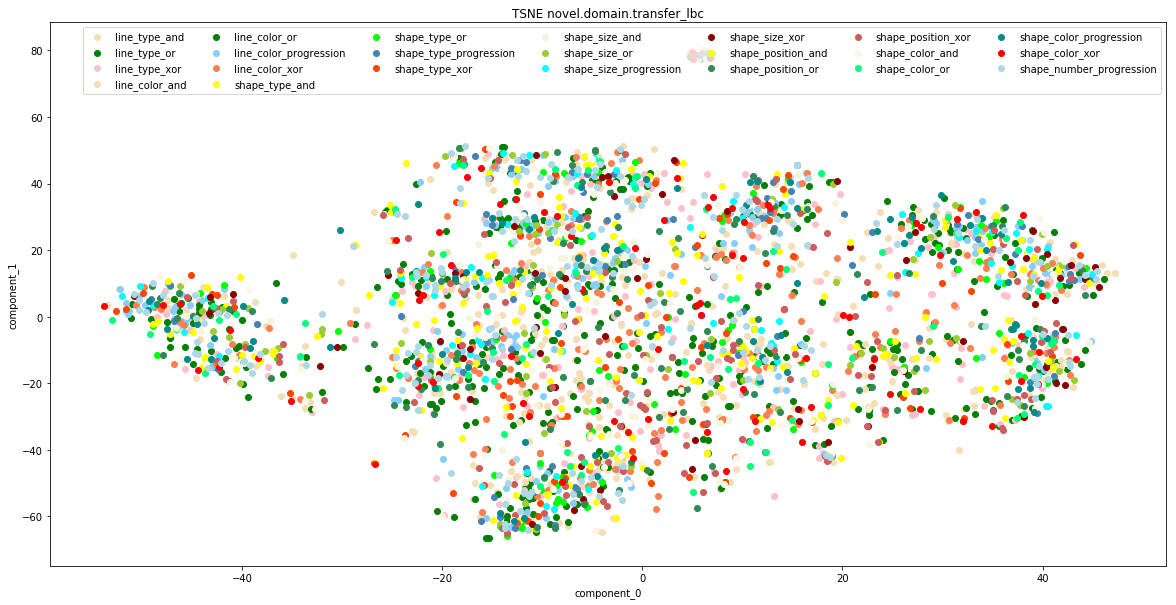

<Figure size 432x288 with 0 Axes>

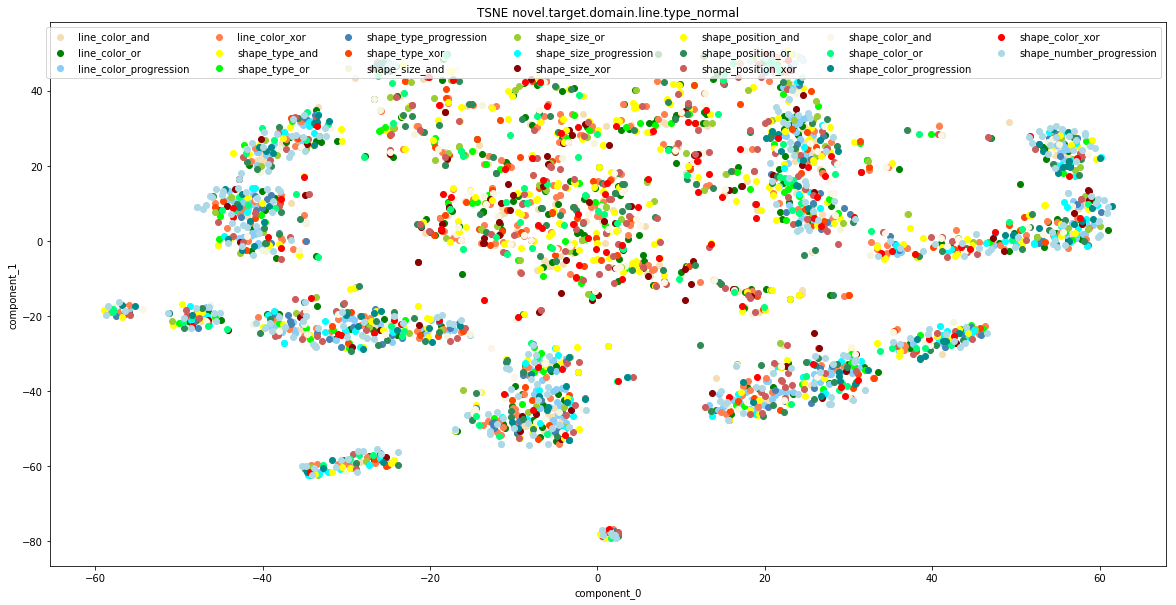

<Figure size 432x288 with 0 Axes>

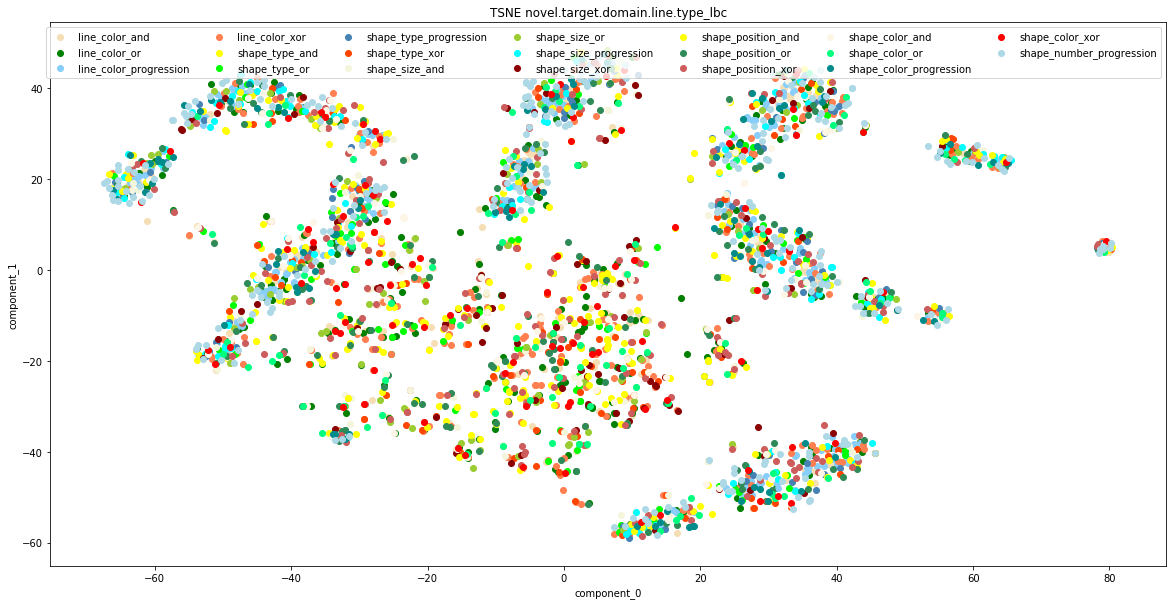

<Figure size 432x288 with 0 Axes>

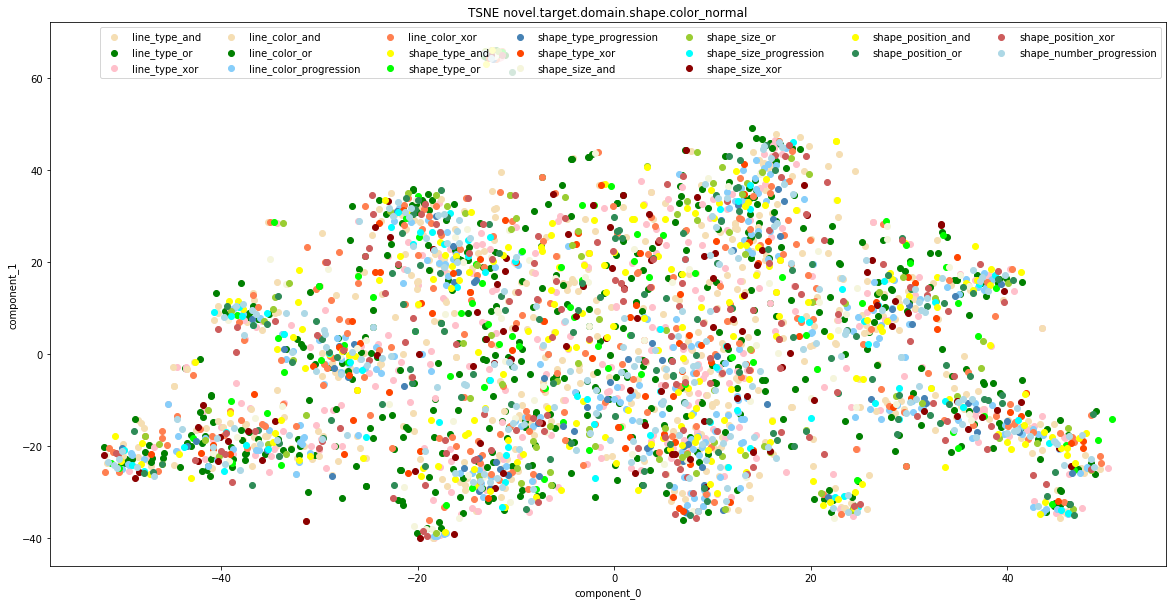

<Figure size 432x288 with 0 Axes>

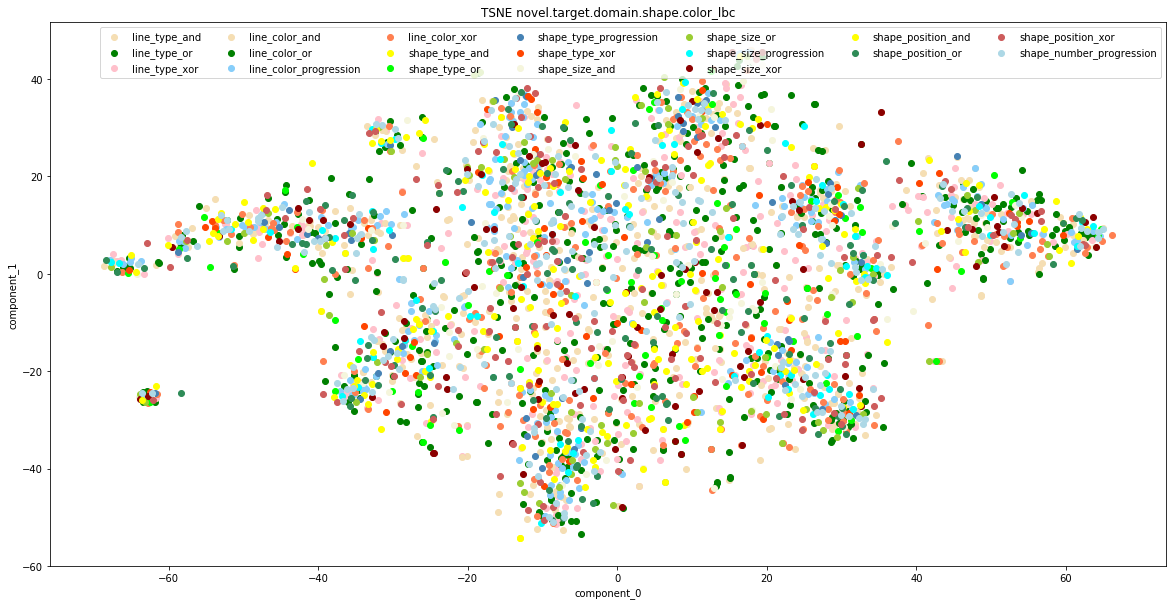

<Figure size 432x288 with 0 Axes>

In [16]:
EE=['novel.domain.transfer','novel.target.domain.line.type','novel.target.domain.shape.color','extrapolation','interpolation']
EE1=['normal','lbc']
import matplotlib.pyplot as plt
for e in range (0,3):
    for ee in range (0,2):
        tsne_plot(dd[e,ee,:,:],aa1[e,ee,:,:],EE[e]+'_'+EE1[ee])

In [40]:
# #normal
# # index1, value=np.where(t==0)
# # index2, value=np.where(t==1)
# from sklearn.decomposition import PCA
# import numpy as np
# def pca_plot(d):
#     pca = PCA()
#     pca.fit(d)
#     d_1=pca.transform(d)
#     #pca.fit(d[index2])
#     #d_2=pca.transform(d[index2])
#     from matplotlib import pyplot as plt
#     #plt.subplot(1,2,1)
#     plt.figure(figsize=[20,10])
#     for i in range (1,8):
#         for j in range (1,8):
#             for r in range (1,5):
#                 if i==1:
#                     l1='type'
#                 if i==2:
#                     l1='size'
#                 if i==3:
#                     l1='position'
#                 if i==4:
#                     l1='color'
#                 if i==5:
#                     l1='number'
#                 if i==6:
#                     l1='line'
#                 if i==7:
#                     l1='shape'
#                 if j==1:
#                     l2='type'
#                     if i==6:
#                         c='blueviolet'
#                     if i==7:
#                         c='gold'
#                 if j==2:
#                     l2='size'
#                     if i==6:
#                         c='blue'
#                     if i==7:
#                         c='yellow'
#                 if j==3:
#                     l2='position'
#                     if i==6:
#                         c='navy'
#                     if i==7:
#                         c='lightgreen'
#                 if j==4:
#                     l2='color'
#                     if i==6:
#                         c='cornflowerblue'
#                     if i==7:
#                         c='orange'
#                 if j==5:
#                     l2='number'
#                     if i==6:
#                         c='lavender'
#                     if i==7:
#                         c='khaki'
#                 if j==6:
#                     l2='line'
#                     if i==6:
#                         c='slateblue'
#                     if i==7:
#                         c='cornsilk'
#                 if j==7:
#                     l2='shape'
#                     if i==6:
#                         c='purple'
#                     if i==7:
#                         c='tan'
#                 if r==1:
#                     l3='and'
#                     m='.'
#                 if r==2:
#                     l3='or'
#                     m='o'
#                 if r==3:
#                     l3='progression'
#                     m='v'
#                 if r==4:
#                     l3='xor'
#                     m='+'
#                 l=str(l1)+'_'+str(l2)+'_'+str(l3)
#                 f=((a1[index1,:]==[i,j,r]).sum(axis=1)==3)            
#                 if f.sum()>0:
#                     plt.scatter(d_1[:,0][(a1[:,:]==[i,j,r]).sum(axis=1)==3],d_1[:,1][(a1[:,:]==[i,j,r]).sum(axis=1)==3],label=l,marker=m,color=c)
#     plt.legend(loc=1, ncol=7)
#     plt.title('PCA normal')
#     plt.show()


In [193]:
np.save('data.npy',dd)

In [4]:
#normal
# index1, value=np.where(t==0)
# index2, value=np.where(t==1)
from sklearn.decomposition import PCA
import numpy as np
def pca_plot(d,a1,w):
    c=np.array([0]).tolist()
    pca = PCA()
    pca.fit(d)
    d_1=pca.transform(d)
    #pca.fit(d[index2])
    #d_2=pca.transform(d[index2])
    from matplotlib import pyplot as plt
    #plt.subplot(1,2,1)
    plt.figure(figsize=[20,10])
    for i in range (1,8):
        for j in range (1,8):
            for r in range (1,5):
                if i==1:
                    l1='type'
                if i==2:
                    l1='size'
                if i==3:
                    l1='position'
                if i==4:
                    l1='color'
                if i==5:
                    l1='number'
                if i==6:
                    l1='line'
                if i==7:
                    l1='shape'
                if j==1:
                    l2='type'
                    if i==6:
                        if r==1:
                            c='wheat'
                        if r==2:
                            c='green'
                        if r==3:
                            c='blue'
                        if r==4:
                            c='pink'
                    if i==7:
                        if r==1:
                            c='yellow'
                        if r==2:
                            c='lime'
                        if r==3:
                            c='steelblue'
                        if r==4:
                            c='orangered'
                if j==2:
                    l2='size'
                    if i==6:
                        if r==1:
                            c='sand'
                        if r==2:
                            c='lightpeagreen'
                        if r==3:
                            c='lightblue'
                        if r==4:
                            c='hotpink'
                    if i==7:
                        if r==1:
                            c='beige'
                        if r==2:
                            c='yellowgreen'
                        if r==3:
                            c='aqua'
                        if r==4:
                            c='darkred'
                if j==3:
                    l2='position'
                    if i==6:
                        if r==1:
                            c='lightyellow'
                        if r==2:
                            c='kermitgreen'
                        if r==3:
                            c='blueblue'
                        if r==4:
                            c='deeppink'
                    if i==7:
                        if r==1:
                            c='yellow'
                        if r==2:
                            c='seagreen'
                        if r==3:
                            c='teal'
                        if r==4:
                            c='indianred'
                if j==4:
                    l2='color'
                    if i==6:
                        if r==1:
                            c='wheat'
                        if r==2:
                            c='green'
                        if r==3:
                            c='lightskyblue'
                        if r==4:
                            c='coral'
                    if i==7:
                        if r==1:
                            c='oldlace'
                        if r==2:
                            c='springgreen'
                        if r==3:
                            c='darkcyan'
                        if r==4:
                            c='red'
                if j==5:
                    l2='number'
                    if i==6:
                        if r==1:
                            c='mastardyellow'
                        if r==2:
                            c='moss'
                        if r==3:
                            c='royal'
                        if r==4:
                            c='cerise'
                    if i==7:
                        if r==1:
                            c='gole'
                        if r==2:
                            c='apple'
                        if r==3:
                            c='lightblue'
                        if r==4:
                            c='ruby'
                if j==6:
                    l2='line'
                    if i==6:
                        if r==1:
                            c='babypoo'
                        if r==2:
                            c='grass'
                        if r==3:
                            c='darkroyalblue'
                        if r==4:
                            c='pinky'
                    if i==7:
                        if r==1:
                            c='babypoop'
                        if r==2:
                            c='teagreen'
                        if r==3:
                            c='strongblue'
                        if r==4:
                            c='rosypink'
                if j==7:
                    l2='shape'
                    if i==6:
                        if r==1:
                            c='dullyellow'
                        if r==2:
                            c='sagegreen'
                        if r==3:
                            c='deepblue'
                        if r==4:
                            c='applegreen'
                    if i==7:
                        if r==1:
                            c='sandyyellow'
                        if r==2:
                            c='palelightgreen'
                        if r==3:
                            c='lightroyalblue'
                        if r==4:
                            c='mutedpink'
                if r==1:
                    l3='and'
                if r==2:
                    l3='or'
                if r==3:
                    l3='progression'
                if r==4:
                    l3='xor'
                l=str(l1)+'_'+str(l2)+'_'+str(l3)
                f=(np.array(a1[:,:]==[i,j,r]).sum(axis=1)==3)            
                if f.sum()>0:
                    #print(i,j,r)
                    plt.scatter(d_1[:,0][np.array(a1[:,:]==[i,j,r]).sum(axis=1)==3],d_1[:,1][np.array(a1[:,:]==[i,j,r]).sum(axis=1)==3],label=l,color=c)
    plt.legend(loc=1, ncol=7)
    plt.title('PCA '+w)
    plt.xlabel('component_0')
    plt.ylabel('component_1')
    plt.show()
    plt.savefig(w+'.png')



In [ ]:
np.save()

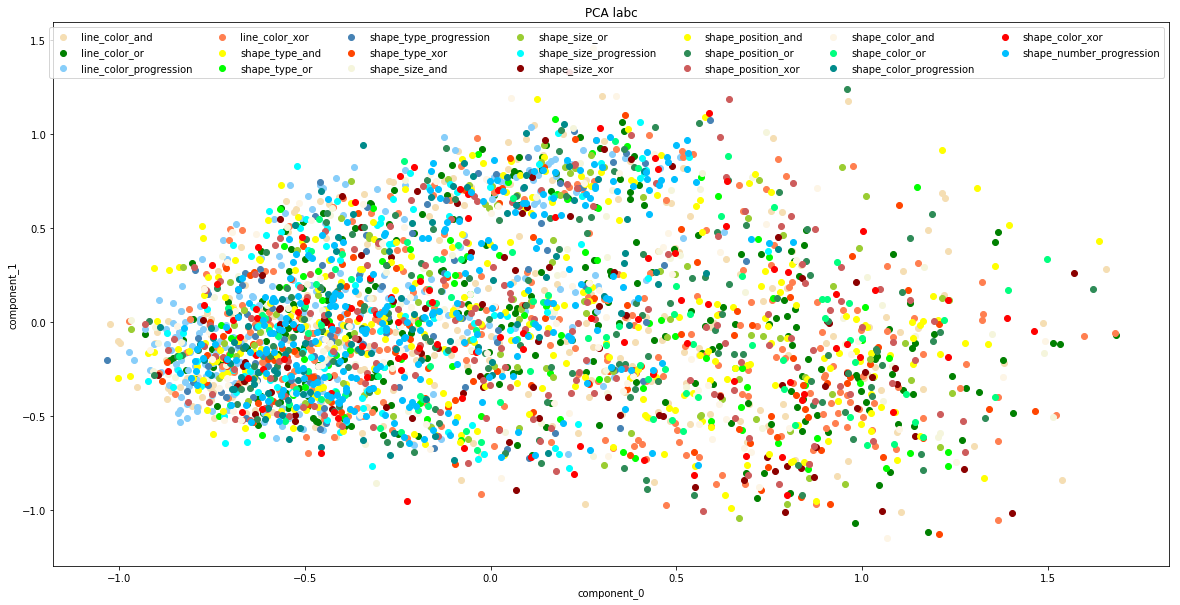

In [155]:
pca_plot(d,a1,'labc')

In [12]:
dd=np.load('data.npy')

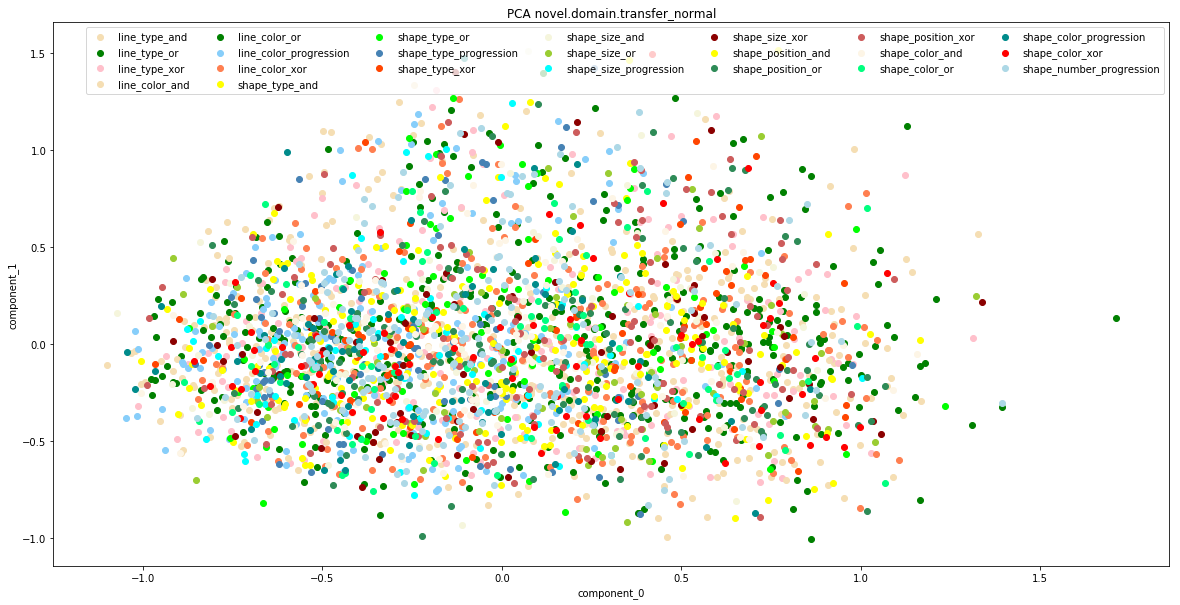

<Figure size 432x288 with 0 Axes>

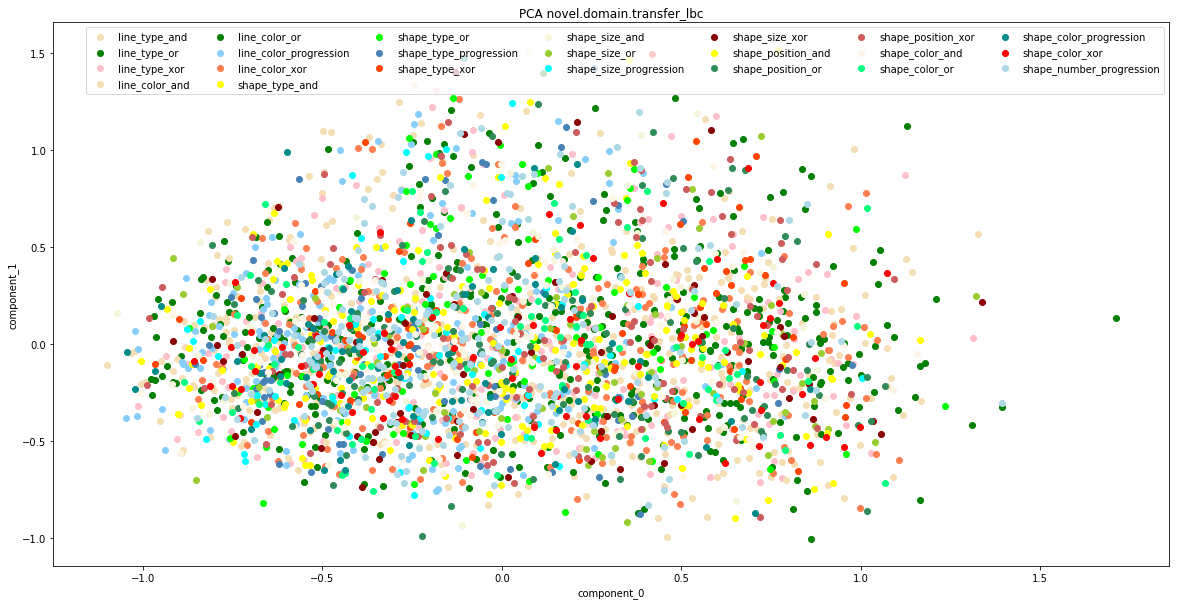

<Figure size 432x288 with 0 Axes>

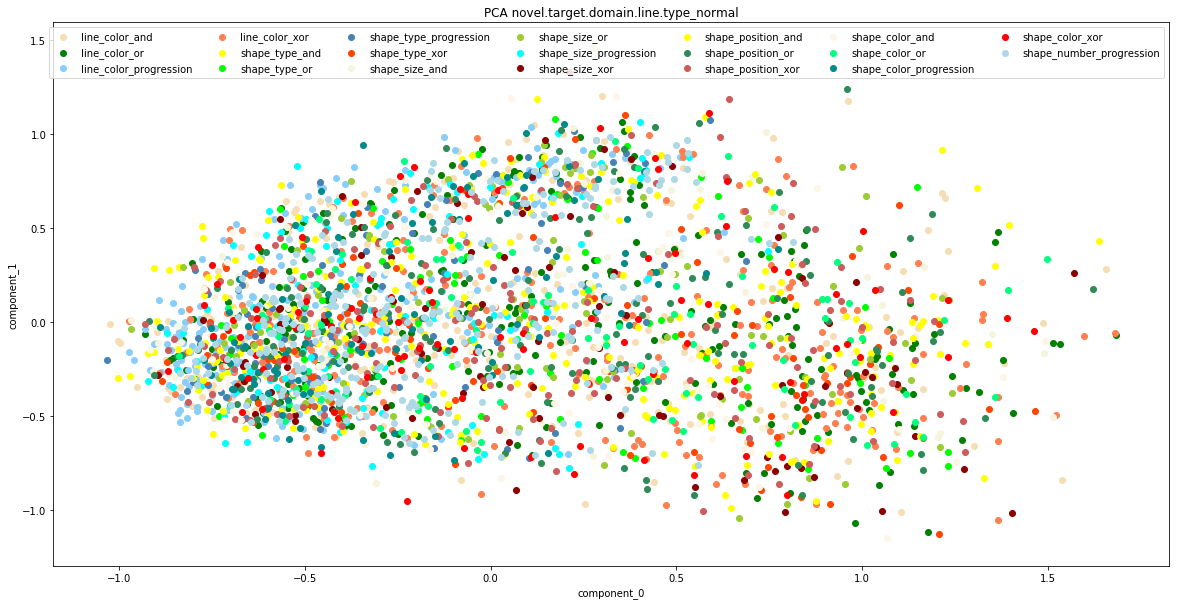

<Figure size 432x288 with 0 Axes>

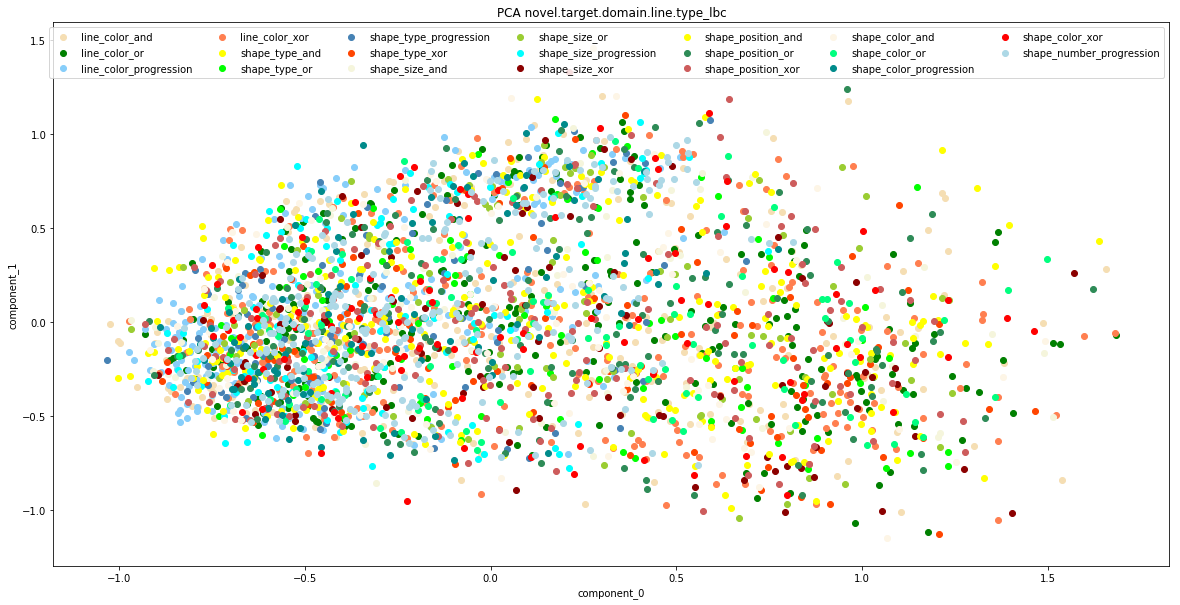

<Figure size 432x288 with 0 Axes>

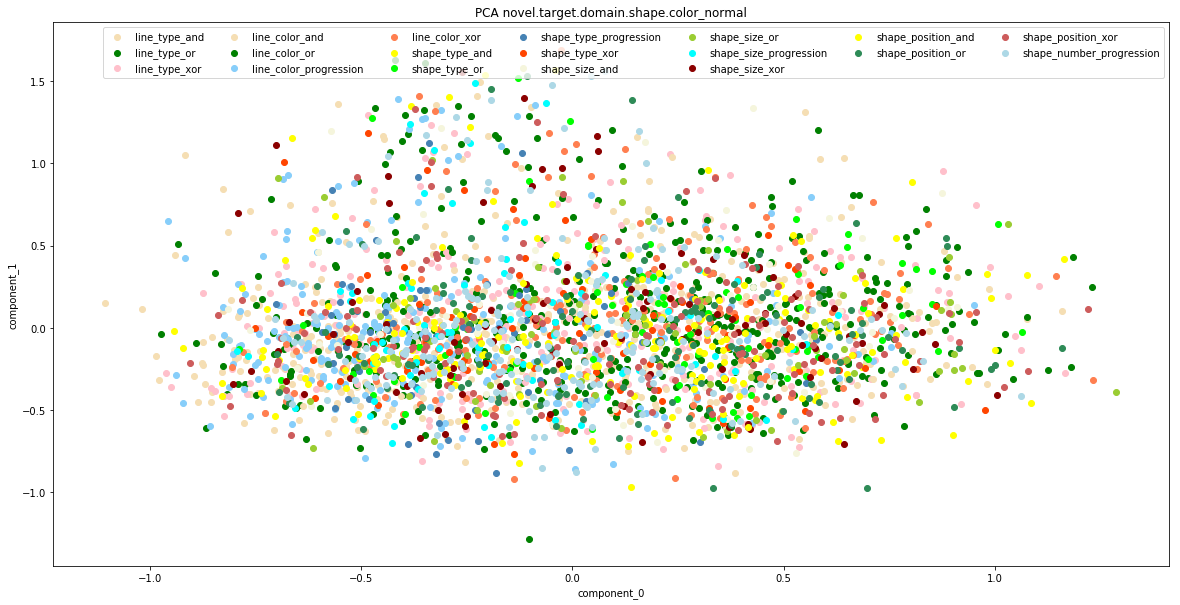

<Figure size 432x288 with 0 Axes>

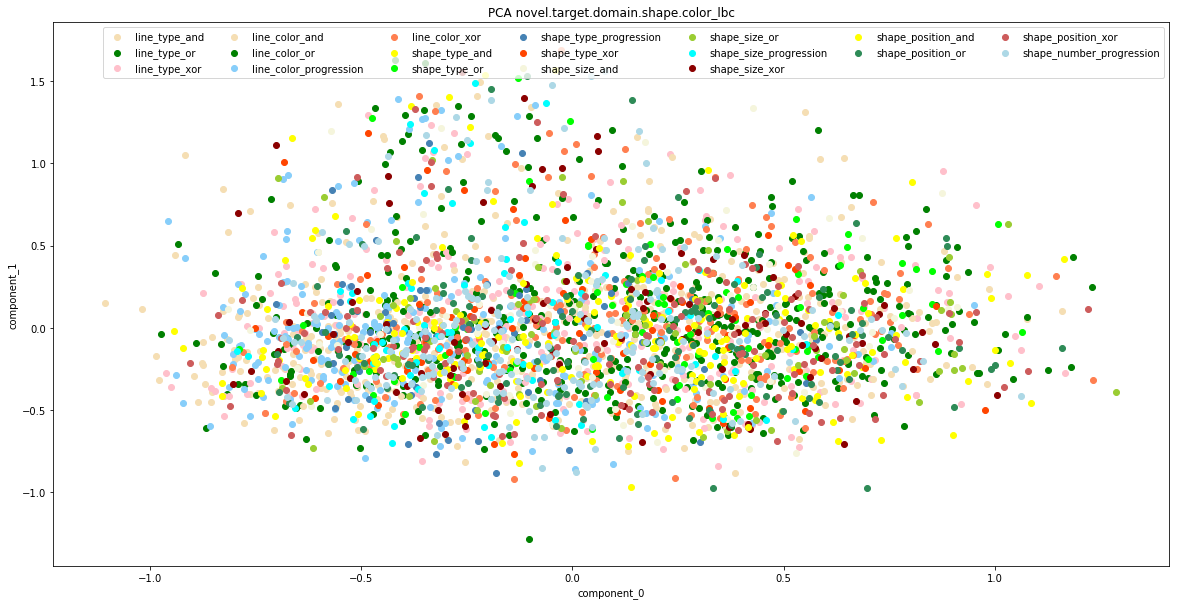

<Figure size 432x288 with 0 Axes>

In [15]:
EE=['novel.domain.transfer','novel.target.domain.line.type','novel.target.domain.shape.color','extrapolation','interpolation']
EE1=['normal','lbc']
import matplotlib.pyplot as plt
for e in range (0,3):
    for ee in range (0,2):
        pca_plot(dd[e,ee,:,:],aa1[e,ee,:,:],EE[e]+'_'+EE1[ee])

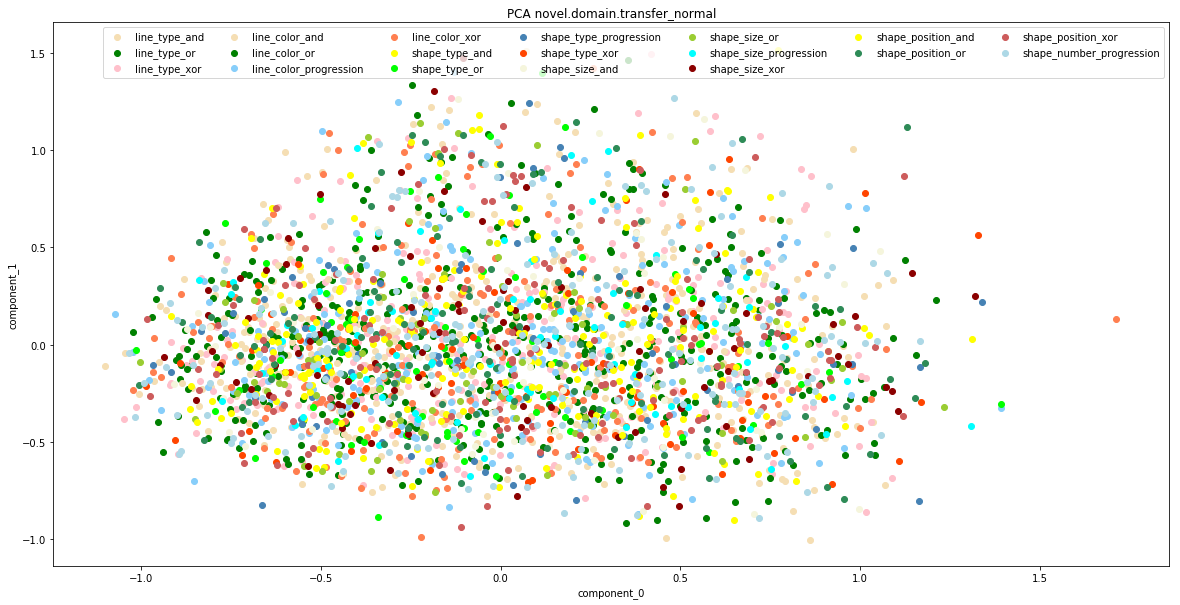

<Figure size 432x288 with 0 Axes>

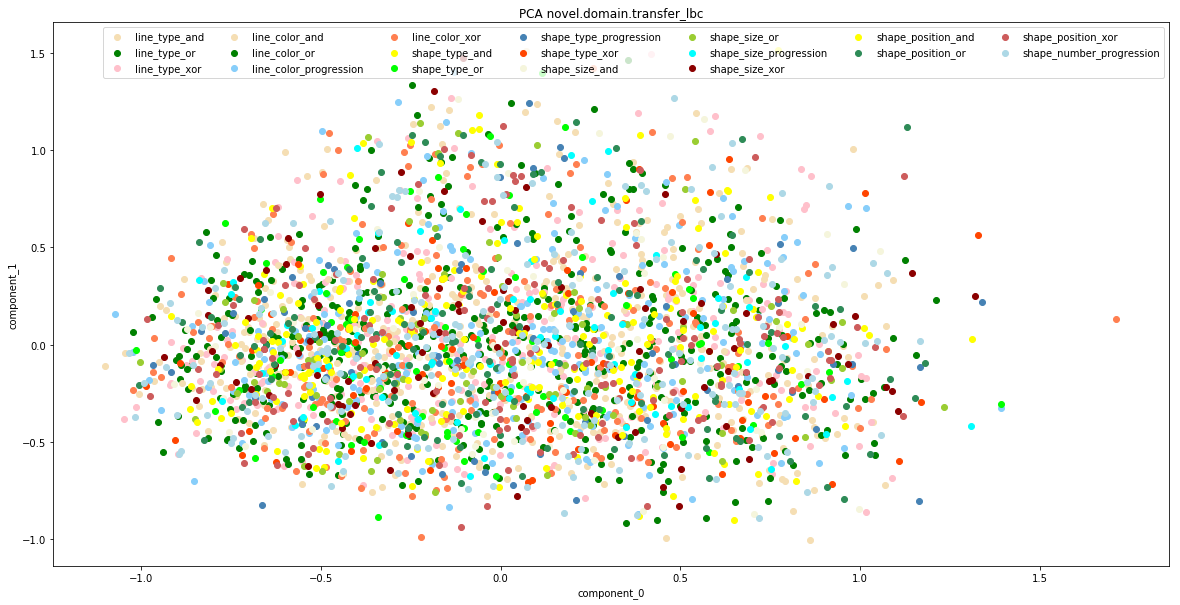

<Figure size 432x288 with 0 Axes>

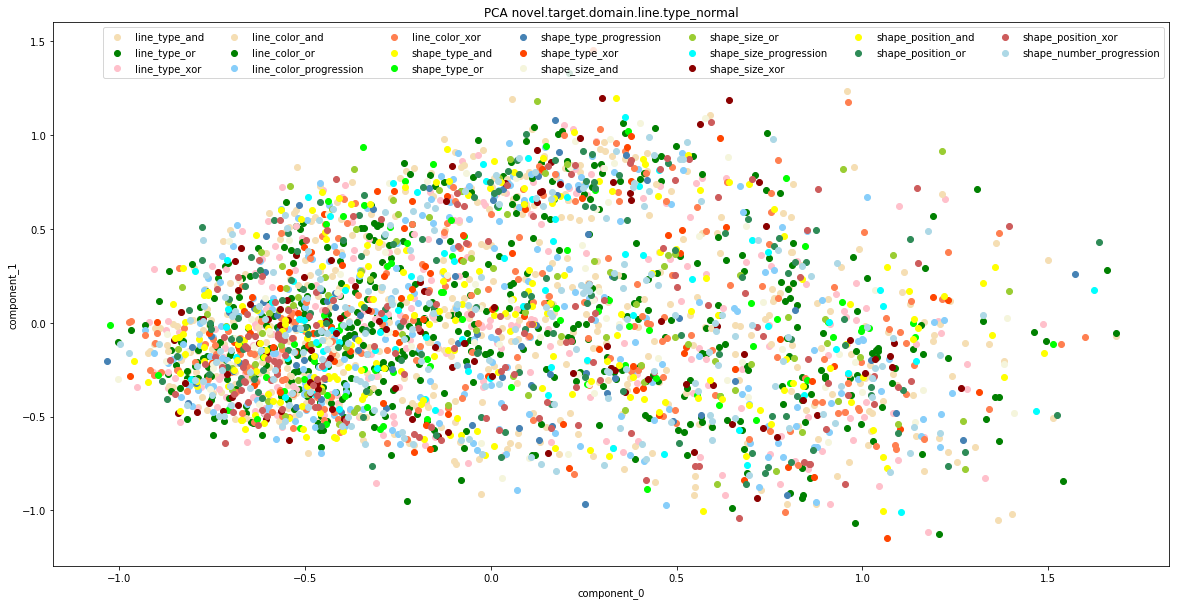

<Figure size 432x288 with 0 Axes>

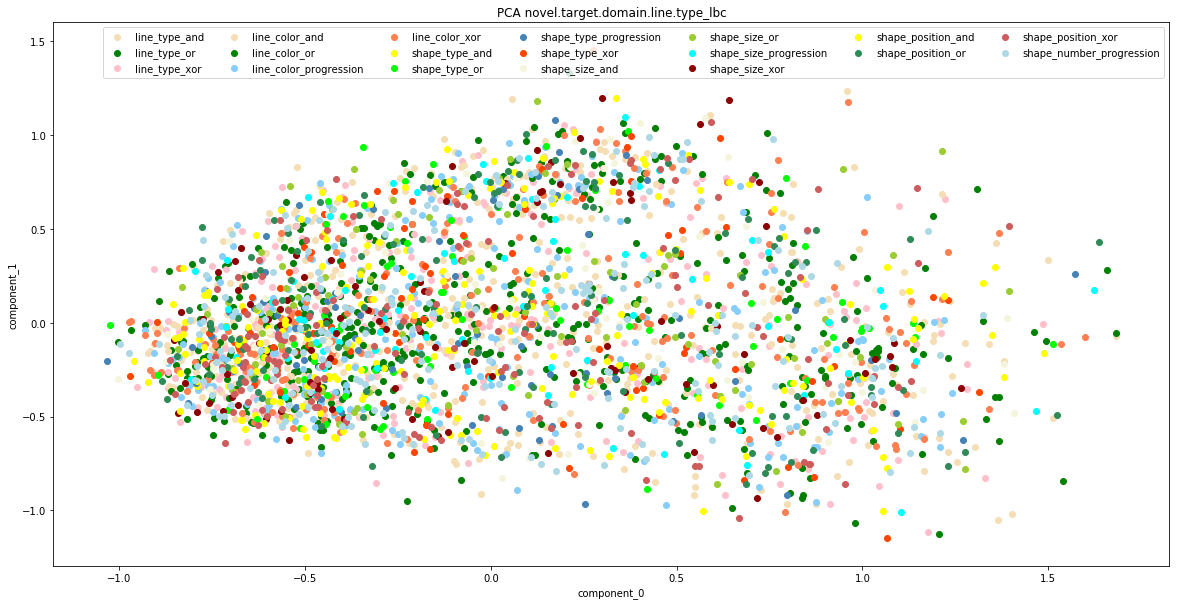

<Figure size 432x288 with 0 Axes>

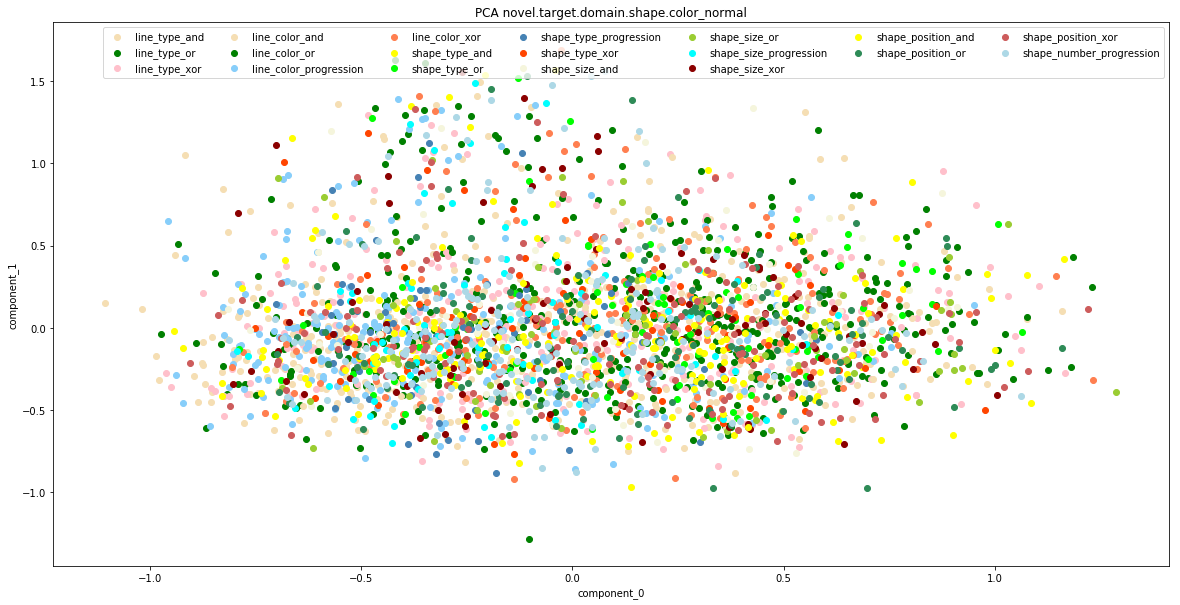

<Figure size 432x288 with 0 Axes>

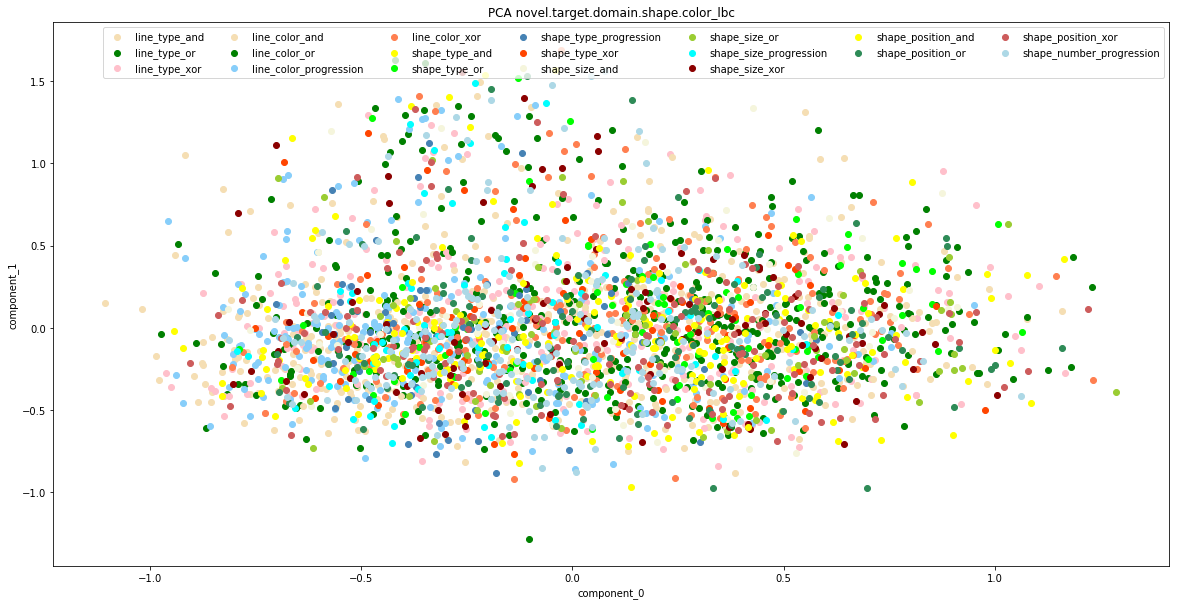

/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/sklearn/decomposition/pca.py:446: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


<Figure size 432x288 with 0 Axes>

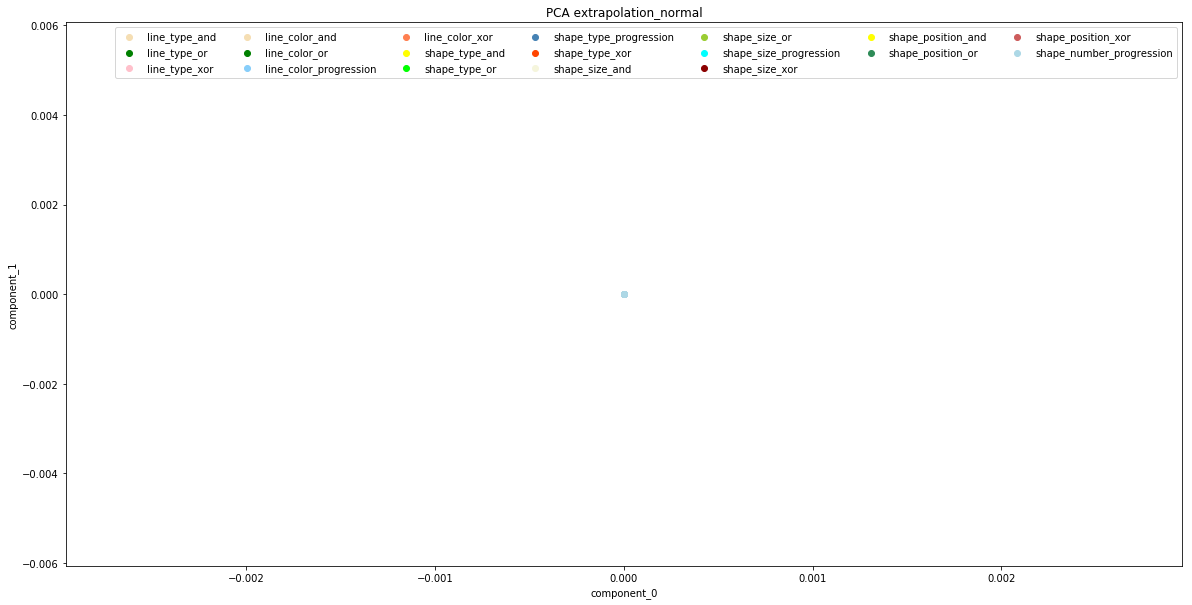

/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/sklearn/decomposition/pca.py:446: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


<Figure size 432x288 with 0 Axes>

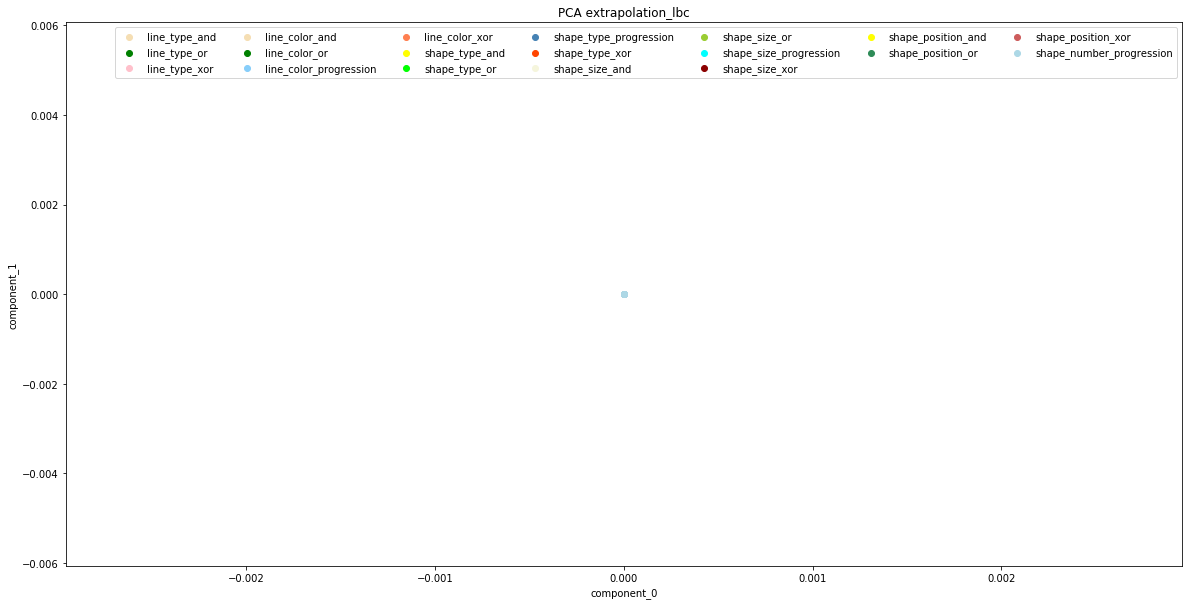

/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/sklearn/decomposition/pca.py:446: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


<Figure size 432x288 with 0 Axes>

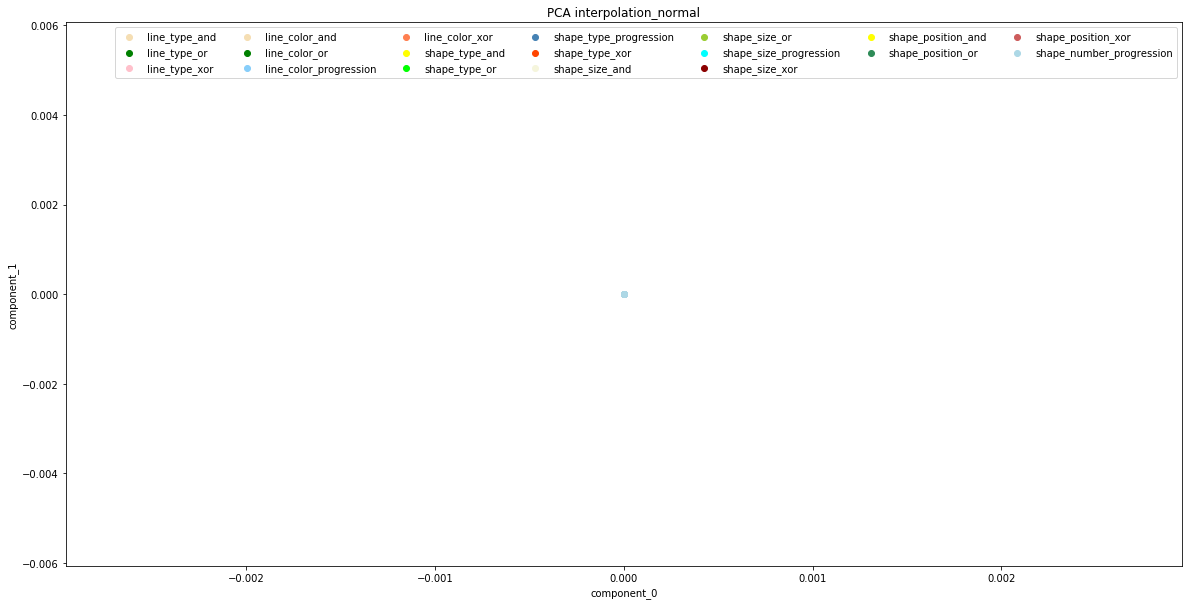

/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/sklearn/decomposition/pca.py:446: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


<Figure size 432x288 with 0 Axes>

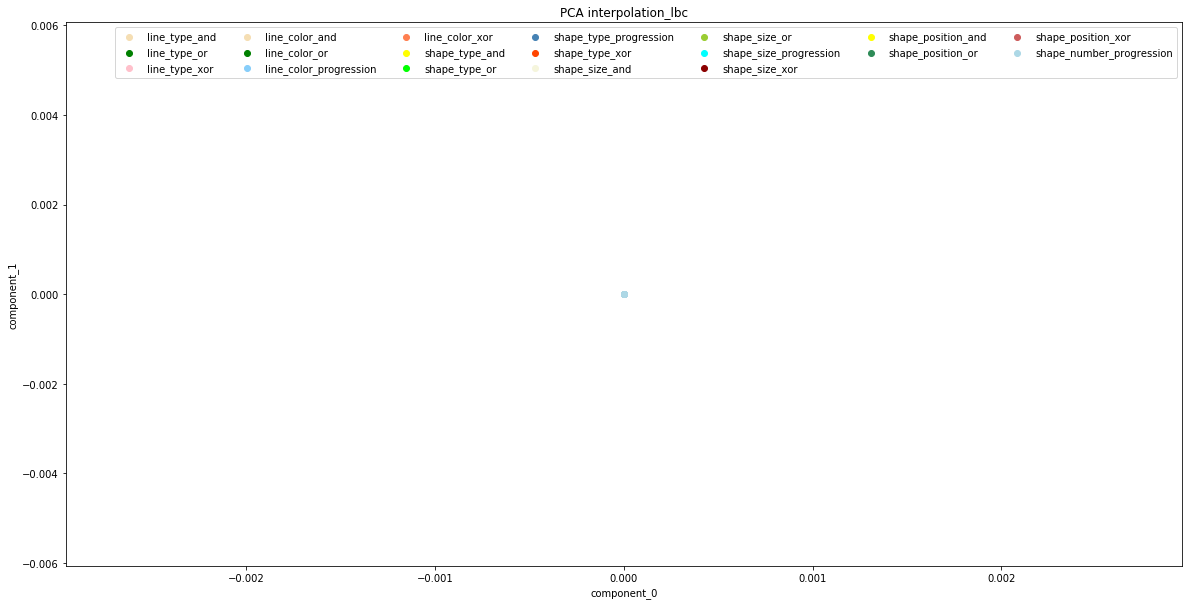

<Figure size 432x288 with 0 Axes>

In [185]:
EE=['novel.domain.transfer','novel.target.domain.line.type','novel.target.domain.shape.color','extrapolation','interpolation']
EE1=['normal','lbc']
import matplotlib.pyplot as plt
for e in range (0,5):
    for ee in range (0,2):
        pca_plot(dd[e,ee,:,:],a1,EE[e]+'_'+EE1[ee])
        #plt.savefig(EE[e]+'_'+EE1[ee]+'.png')


In [168]:
dd

array([[[[-0.14123142, -0.26781285,  0.10841881, ..., -0.39280134,
           0.57044566, -0.1599004 ],
         [ 0.03279687,  0.04277453, -0.09277306, ..., -0.10609327,
           0.33579057, -0.25123361],
         [-0.0158813 ,  0.04669876,  0.15280151, ..., -0.10581876,
           0.08501144,  0.00955889],
         ...,
         [ 0.80001259, -0.17027229, -0.17910862, ..., -0.47213802,
          -0.34901172,  0.05151819],
         [ 0.08757467,  0.10515445,  0.0510307 , ..., -0.00667262,
           0.0505679 , -0.16386208],
         [ 0.02230874, -0.54845047,  0.69035125, ..., -0.13022614,
           0.29143336,  0.23967448]],

        [[-0.14123142, -0.26781285,  0.10841881, ..., -0.39280134,
           0.57044566, -0.1599004 ],
         [ 0.03279687,  0.04277453, -0.09277306, ..., -0.10609327,
           0.33579057, -0.25123361],
         [-0.0158813 ,  0.04669876,  0.15280151, ..., -0.10581876,
           0.08501144,  0.00955889],
         ...,
         [ 0.80001259, -0.17027229

In [7]:
import os
import random
import numpy as np
import torch
from experiment_builder import ExperimentBuilder
#from model_architectures import ConvolutionalNetwork
from model_architectures import LBC
aa1=np.zeros((3,2,3000,3))
EE=['novel.domain.transfer','novel.target.domain.line.type','novel.target.domain.shape.color']
EE1=['normal','lbc']
EE2=['1','2','3']
# E='novel.target.domain.line.type'
# E1='normal'
# E2='2'
k=-1
kk=-1
for E,E2 in zip(EE,EE2):
    k+=1
    kk=-1
    for E1 in EE1:
        kk+=1
        dirr='/Users/sofiadunlosky/Downloads/samples/'+E+'/test'
        name=os.listdir(dirr)
        data_path=(dirr+'/')
        #model_dir='/run/media/s1883226/Seagate Backup Plus Drive/mlp/models/train_model_0'
        #model_dir='/Users/sofiadunlosky/Downloads/train_model_55.dms'
        #E1='lbc'
        model_dir='/Users/sofiadunlosky/Downloads/models_visual_analogy/'+E1+'_exp'+E2+'_best_model'
        aa1[k,kk,:,:]=label_name(name)

In [8]:
np.save('label.npy',aa1)

In [6]:
a1

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [167]:
import os
import random
import numpy as np
import torch
from experiment_builder import ExperimentBuilder
#from model_architectures import ConvolutionalNetwork
from model_architectures import LBC
dd=np.zeros((5,2,3000,64))
EE=['novel.domain.transfer','novel.target.domain.line.type','novel.target.domain.shape.color','extrapolation','interpolation']
EE1=['normal','lbc']
EE2=['1','2','3','4','5']
# E='novel.target.domain.line.type'
# E1='normal'
# E2='2'
k=-1
kk=-1
for E,E2 in zip(EE,EE2):
    k+=1
    kk=-1
    for E1 in EE1:
        kk+=1
        dirr='/Users/sofiadunlosky/Downloads/samples/'+E+'/test'
        name=os.listdir(dirr)
        data_path=(dirr+'/')
        #model_dir='/run/media/s1883226/Seagate Backup Plus Drive/mlp/models/train_model_0'
        #model_dir='/Users/sofiadunlosky/Downloads/train_model_55.dms'
        #E1='lbc'
        model_dir='/Users/sofiadunlosky/Downloads/models_visual_analogy/'+E1+'_exp'+E2+'_best_model'
        a1=label_name(name)
        dd[k,kk,:,:]=data_run(name,model_dir)

Building basic block of LBC using input shape [100, 9, 80, 80]
Actual shape accepted for CNN: (900, 1, 80, 80)
torch.Size([900, 32, 39, 39])
torch.Size([900, 32, 19, 19])
torch.Size([900, 32, 9, 9])
torch.Size([900, 32, 4, 4])
shape after CNN torch.Size([900, 32, 4, 4])
shape before RNN torch.Size([400, 6, 512])
shape after RNN torch.Size([100, 4, 64])
Block is built, output volume is torch.Size([100, 4])
use CPU
/Volumes/DISK_IMG/models/1 /Volumes/DISK_IMG/models/1/result_outputs


/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/torch/nn/modules/rnn.py:46: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Building basic block of LBC using input shape [100, 9, 80, 80]
Actual shape accepted for CNN: (900, 1, 80, 80)
torch.Size([900, 32, 39, 39])
torch.Size([900, 32, 19, 19])
torch.Size([900, 32, 9, 9])
torch.Size([900, 32, 4, 4])
shape after CNN torch.Size([900, 32, 4, 4])
shape before RNN torch.Size([400, 6, 512])
shape after RNN torch.Size([100, 4, 64])
Block is built, output volume is torch.Size([100, 4])
use CPU
/Volumes/DISK_IMG/models/1 /Volumes/DISK_IMG/models/1/result_outputs
Building basic block of LBC using input shape [100, 9, 80, 80]
Actual shape accepted for CNN: (900, 1, 80, 80)
torch.Size([900, 32, 39, 39])
torch.Size([900, 32, 19, 19])
torch.Size([900, 32, 9, 9])
torch.Size([900, 32, 4, 4])
shape after CNN torch.Size([900, 32, 4, 4])
shape before RNN torch.Size([400, 6, 512])
shape after RNN torch.Size([100, 4, 64])
Block is built, output volume is torch.Size([100, 4])
use CPU
/Volumes/DISK_IMG/models/1 /Volumes/DISK_IMG/models/1/result_outputs
Building basic block of LBC 

Building basic block of LBC using input shape [100, 9, 80, 80]
Actual shape accepted for CNN: (900, 1, 80, 80)
torch.Size([900, 32, 39, 39])
torch.Size([900, 32, 19, 19])
torch.Size([900, 32, 9, 9])
torch.Size([900, 32, 4, 4])
shape after CNN torch.Size([900, 32, 4, 4])
shape before RNN torch.Size([400, 6, 512])
shape after RNN torch.Size([100, 4, 64])
Block is built, output volume is torch.Size([100, 4])
use CPU
/Volumes/DISK_IMG/models/1 /Volumes/DISK_IMG/models/1/result_outputs
Building basic block of LBC using input shape [100, 9, 80, 80]
Actual shape accepted for CNN: (900, 1, 80, 80)
torch.Size([900, 32, 39, 39])
torch.Size([900, 32, 19, 19])
torch.Size([900, 32, 9, 9])
torch.Size([900, 32, 4, 4])
shape after CNN torch.Size([900, 32, 4, 4])
shape before RNN torch.Size([400, 6, 512])
shape after RNN torch.Size([100, 4, 64])
Block is built, output volume is torch.Size([100, 4])
use CPU
/Volumes/DISK_IMG/models/1 /Volumes/DISK_IMG/models/1/result_outputs
Building basic block of LBC 

Building basic block of LBC using input shape [100, 9, 80, 80]
Actual shape accepted for CNN: (900, 1, 80, 80)
torch.Size([900, 32, 39, 39])
torch.Size([900, 32, 19, 19])
torch.Size([900, 32, 9, 9])
torch.Size([900, 32, 4, 4])
shape after CNN torch.Size([900, 32, 4, 4])
shape before RNN torch.Size([400, 6, 512])
shape after RNN torch.Size([100, 4, 64])
Block is built, output volume is torch.Size([100, 4])
use CPU
/Volumes/DISK_IMG/models/1 /Volumes/DISK_IMG/models/1/result_outputs
Building basic block of LBC using input shape [100, 9, 80, 80]
Actual shape accepted for CNN: (900, 1, 80, 80)
torch.Size([900, 32, 39, 39])
torch.Size([900, 32, 19, 19])
torch.Size([900, 32, 9, 9])
torch.Size([900, 32, 4, 4])
shape after CNN torch.Size([900, 32, 4, 4])
shape before RNN torch.Size([400, 6, 512])
shape after RNN torch.Size([100, 4, 64])
Block is built, output volume is torch.Size([100, 4])
use CPU
/Volumes/DISK_IMG/models/1 /Volumes/DISK_IMG/models/1/result_outputs
Building basic block of LBC 

Building basic block of LBC using input shape [100, 9, 80, 80]
Actual shape accepted for CNN: (900, 1, 80, 80)
torch.Size([900, 32, 39, 39])
torch.Size([900, 32, 19, 19])
torch.Size([900, 32, 9, 9])
torch.Size([900, 32, 4, 4])
shape after CNN torch.Size([900, 32, 4, 4])
shape before RNN torch.Size([400, 6, 512])
shape after RNN torch.Size([100, 4, 64])
Block is built, output volume is torch.Size([100, 4])
use CPU
/Volumes/DISK_IMG/models/1 /Volumes/DISK_IMG/models/1/result_outputs
Building basic block of LBC using input shape [100, 9, 80, 80]
Actual shape accepted for CNN: (900, 1, 80, 80)
torch.Size([900, 32, 39, 39])
torch.Size([900, 32, 19, 19])
torch.Size([900, 32, 9, 9])
torch.Size([900, 32, 4, 4])
shape after CNN torch.Size([900, 32, 4, 4])
shape before RNN torch.Size([400, 6, 512])
shape after RNN torch.Size([100, 4, 64])
Block is built, output volume is torch.Size([100, 4])
use CPU
/Volumes/DISK_IMG/models/1 /Volumes/DISK_IMG/models/1/result_outputs
Building basic block of LBC 

Building basic block of LBC using input shape [100, 9, 80, 80]
Actual shape accepted for CNN: (900, 1, 80, 80)
torch.Size([900, 32, 39, 39])
torch.Size([900, 32, 19, 19])
torch.Size([900, 32, 9, 9])
torch.Size([900, 32, 4, 4])
shape after CNN torch.Size([900, 32, 4, 4])
shape before RNN torch.Size([400, 6, 512])
shape after RNN torch.Size([100, 4, 64])
Block is built, output volume is torch.Size([100, 4])
use CPU
/Volumes/DISK_IMG/models/1 /Volumes/DISK_IMG/models/1/result_outputs
Building basic block of LBC using input shape [100, 9, 80, 80]
Actual shape accepted for CNN: (900, 1, 80, 80)
torch.Size([900, 32, 39, 39])
torch.Size([900, 32, 19, 19])
torch.Size([900, 32, 9, 9])
torch.Size([900, 32, 4, 4])
shape after CNN torch.Size([900, 32, 4, 4])
shape before RNN torch.Size([400, 6, 512])
shape after RNN torch.Size([100, 4, 64])
Block is built, output volume is torch.Size([100, 4])
use CPU
/Volumes/DISK_IMG/models/1 /Volumes/DISK_IMG/models/1/result_outputs
Building basic block of LBC 

Building basic block of LBC using input shape [100, 9, 80, 80]
Actual shape accepted for CNN: (900, 1, 80, 80)
torch.Size([900, 32, 39, 39])
torch.Size([900, 32, 19, 19])
torch.Size([900, 32, 9, 9])
torch.Size([900, 32, 4, 4])
shape after CNN torch.Size([900, 32, 4, 4])
shape before RNN torch.Size([400, 6, 512])
shape after RNN torch.Size([100, 4, 64])
Block is built, output volume is torch.Size([100, 4])
use CPU
/Volumes/DISK_IMG/models/1 /Volumes/DISK_IMG/models/1/result_outputs
Building basic block of LBC using input shape [100, 9, 80, 80]
Actual shape accepted for CNN: (900, 1, 80, 80)
torch.Size([900, 32, 39, 39])
torch.Size([900, 32, 19, 19])
torch.Size([900, 32, 9, 9])
torch.Size([900, 32, 4, 4])
shape after CNN torch.Size([900, 32, 4, 4])
shape before RNN torch.Size([400, 6, 512])
shape after RNN torch.Size([100, 4, 64])
Block is built, output volume is torch.Size([100, 4])
use CPU
/Volumes/DISK_IMG/models/1 /Volumes/DISK_IMG/models/1/result_outputs
Building basic block of LBC 

Building basic block of LBC using input shape [100, 9, 80, 80]
Actual shape accepted for CNN: (900, 1, 80, 80)
torch.Size([900, 32, 39, 39])
torch.Size([900, 32, 19, 19])
torch.Size([900, 32, 9, 9])
torch.Size([900, 32, 4, 4])
shape after CNN torch.Size([900, 32, 4, 4])
shape before RNN torch.Size([400, 6, 512])
shape after RNN torch.Size([100, 4, 64])
Block is built, output volume is torch.Size([100, 4])
use CPU
/Volumes/DISK_IMG/models/1 /Volumes/DISK_IMG/models/1/result_outputs
Building basic block of LBC using input shape [100, 9, 80, 80]
Actual shape accepted for CNN: (900, 1, 80, 80)
torch.Size([900, 32, 39, 39])
torch.Size([900, 32, 19, 19])
torch.Size([900, 32, 9, 9])
torch.Size([900, 32, 4, 4])
shape after CNN torch.Size([900, 32, 4, 4])
shape before RNN torch.Size([400, 6, 512])
shape after RNN torch.Size([100, 4, 64])
Block is built, output volume is torch.Size([100, 4])
use CPU
/Volumes/DISK_IMG/models/1 /Volumes/DISK_IMG/models/1/result_outputs
Building basic block of LBC 

Building basic block of LBC using input shape [100, 9, 80, 80]
Actual shape accepted for CNN: (900, 1, 80, 80)
torch.Size([900, 32, 39, 39])
torch.Size([900, 32, 19, 19])
torch.Size([900, 32, 9, 9])
torch.Size([900, 32, 4, 4])
shape after CNN torch.Size([900, 32, 4, 4])
shape before RNN torch.Size([400, 6, 512])
shape after RNN torch.Size([100, 4, 64])
Block is built, output volume is torch.Size([100, 4])
use CPU
/Volumes/DISK_IMG/models/1 /Volumes/DISK_IMG/models/1/result_outputs
Building basic block of LBC using input shape [100, 9, 80, 80]
Actual shape accepted for CNN: (900, 1, 80, 80)
torch.Size([900, 32, 39, 39])
torch.Size([900, 32, 19, 19])
torch.Size([900, 32, 9, 9])
torch.Size([900, 32, 4, 4])
shape after CNN torch.Size([900, 32, 4, 4])
shape before RNN torch.Size([400, 6, 512])
shape after RNN torch.Size([100, 4, 64])
Block is built, output volume is torch.Size([100, 4])
use CPU
/Volumes/DISK_IMG/models/1 /Volumes/DISK_IMG/models/1/result_outputs
Building basic block of LBC 

Building basic block of LBC using input shape [100, 9, 80, 80]
Actual shape accepted for CNN: (900, 1, 80, 80)
torch.Size([900, 32, 39, 39])
torch.Size([900, 32, 19, 19])
torch.Size([900, 32, 9, 9])
torch.Size([900, 32, 4, 4])
shape after CNN torch.Size([900, 32, 4, 4])
shape before RNN torch.Size([400, 6, 512])
shape after RNN torch.Size([100, 4, 64])
Block is built, output volume is torch.Size([100, 4])
use CPU
/Volumes/DISK_IMG/models/1 /Volumes/DISK_IMG/models/1/result_outputs
Building basic block of LBC using input shape [100, 9, 80, 80]
Actual shape accepted for CNN: (900, 1, 80, 80)
torch.Size([900, 32, 39, 39])
torch.Size([900, 32, 19, 19])
torch.Size([900, 32, 9, 9])
torch.Size([900, 32, 4, 4])
shape after CNN torch.Size([900, 32, 4, 4])
shape before RNN torch.Size([400, 6, 512])
shape after RNN torch.Size([100, 4, 64])
Block is built, output volume is torch.Size([100, 4])
use CPU
/Volumes/DISK_IMG/models/1 /Volumes/DISK_IMG/models/1/result_outputs
Building basic block of LBC 

Building basic block of LBC using input shape [100, 9, 80, 80]
Actual shape accepted for CNN: (900, 1, 80, 80)
torch.Size([900, 32, 39, 39])
torch.Size([900, 32, 19, 19])
torch.Size([900, 32, 9, 9])
torch.Size([900, 32, 4, 4])
shape after CNN torch.Size([900, 32, 4, 4])
shape before RNN torch.Size([400, 6, 512])
shape after RNN torch.Size([100, 4, 64])
Block is built, output volume is torch.Size([100, 4])
use CPU
/Volumes/DISK_IMG/models/1 /Volumes/DISK_IMG/models/1/result_outputs
Building basic block of LBC using input shape [100, 9, 80, 80]
Actual shape accepted for CNN: (900, 1, 80, 80)
torch.Size([900, 32, 39, 39])
torch.Size([900, 32, 19, 19])
torch.Size([900, 32, 9, 9])
torch.Size([900, 32, 4, 4])
shape after CNN torch.Size([900, 32, 4, 4])
shape before RNN torch.Size([400, 6, 512])
shape after RNN torch.Size([100, 4, 64])
Block is built, output volume is torch.Size([100, 4])
use CPU
/Volumes/DISK_IMG/models/1 /Volumes/DISK_IMG/models/1/result_outputs
Building basic block of LBC 

Building basic block of LBC using input shape [100, 9, 80, 80]
Actual shape accepted for CNN: (900, 1, 80, 80)
torch.Size([900, 32, 39, 39])
torch.Size([900, 32, 19, 19])
torch.Size([900, 32, 9, 9])
torch.Size([900, 32, 4, 4])
shape after CNN torch.Size([900, 32, 4, 4])
shape before RNN torch.Size([400, 6, 512])
shape after RNN torch.Size([100, 4, 64])
Block is built, output volume is torch.Size([100, 4])
use CPU
/Volumes/DISK_IMG/models/1 /Volumes/DISK_IMG/models/1/result_outputs
Building basic block of LBC using input shape [100, 9, 80, 80]
Actual shape accepted for CNN: (900, 1, 80, 80)
torch.Size([900, 32, 39, 39])
torch.Size([900, 32, 19, 19])
torch.Size([900, 32, 9, 9])
torch.Size([900, 32, 4, 4])
shape after CNN torch.Size([900, 32, 4, 4])
shape before RNN torch.Size([400, 6, 512])
shape after RNN torch.Size([100, 4, 64])
Block is built, output volume is torch.Size([100, 4])
use CPU
/Volumes/DISK_IMG/models/1 /Volumes/DISK_IMG/models/1/result_outputs
Building basic block of LBC 

KeyboardInterrupt: 

In [163]:
d.shape

(3000, 64)

Building basic block of LBC using input shape [100, 9, 80, 80]
Actual shape accepted for CNN: (900, 1, 80, 80)
torch.Size([900, 32, 39, 39])
torch.Size([900, 32, 19, 19])
torch.Size([900, 32, 9, 9])
torch.Size([900, 32, 4, 4])
shape after CNN torch.Size([900, 32, 4, 4])
shape before RNN torch.Size([400, 6, 512])
shape after RNN torch.Size([100, 4, 64])
Block is built, output volume is torch.Size([100, 4])
use CPU
/Volumes/DISK_IMG/models/1 /Volumes/DISK_IMG/models/1/result_outputs
Building basic block of LBC using input shape [100, 9, 80, 80]
Actual shape accepted for CNN: (900, 1, 80, 80)
torch.Size([900, 32, 39, 39])
torch.Size([900, 32, 19, 19])
torch.Size([900, 32, 9, 9])
torch.Size([900, 32, 4, 4])
shape after CNN torch.Size([900, 32, 4, 4])
shape before RNN torch.Size([400, 6, 512])
shape after RNN torch.Size([100, 4, 64])
Block is built, output volume is torch.Size([100, 4])
use CPU
/Volumes/DISK_IMG/models/1 /Volumes/DISK_IMG/models/1/result_outputs
Building basic block of LBC 

Building basic block of LBC using input shape [100, 9, 80, 80]
Actual shape accepted for CNN: (900, 1, 80, 80)
torch.Size([900, 32, 39, 39])
torch.Size([900, 32, 19, 19])
torch.Size([900, 32, 9, 9])
torch.Size([900, 32, 4, 4])
shape after CNN torch.Size([900, 32, 4, 4])
shape before RNN torch.Size([400, 6, 512])
shape after RNN torch.Size([100, 4, 64])
Block is built, output volume is torch.Size([100, 4])
use CPU
/Volumes/DISK_IMG/models/1 /Volumes/DISK_IMG/models/1/result_outputs
Building basic block of LBC using input shape [100, 9, 80, 80]
Actual shape accepted for CNN: (900, 1, 80, 80)
torch.Size([900, 32, 39, 39])
torch.Size([900, 32, 19, 19])
torch.Size([900, 32, 9, 9])
torch.Size([900, 32, 4, 4])
shape after CNN torch.Size([900, 32, 4, 4])
shape before RNN torch.Size([400, 6, 512])
shape after RNN torch.Size([100, 4, 64])
Block is built, output volume is torch.Size([100, 4])
use CPU
/Volumes/DISK_IMG/models/1 /Volumes/DISK_IMG/models/1/result_outputs
Building basic block of LBC 

No handles with labels found to put in legend.


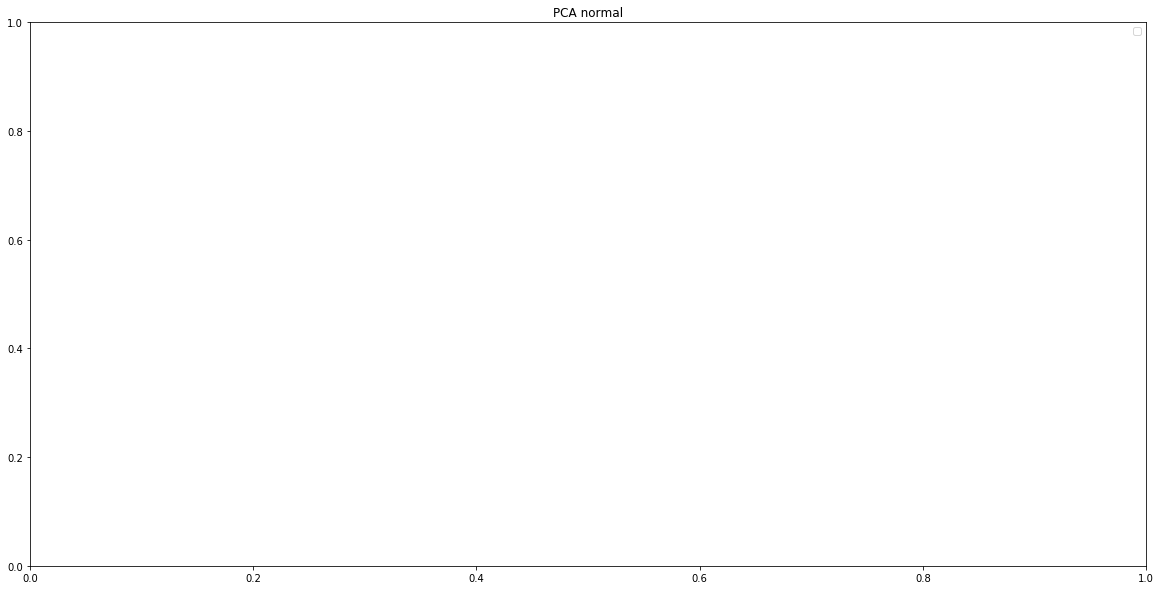

In [44]:
import os
import random
import numpy as np
import torch
from experiment_builder import ExperimentBuilder
#from model_architectures import ConvolutionalNetwork
from model_architectures import LBC
#dirr='/run/media/s1883226/Seagate Backup Plus Drive/v/samples/novel.domain.transfer/test'
E='novel.target.domain.line.type'
E1='normal'
E2='2'
dirr='/Users/sofiadunlosky/Downloads/samples/'+E+'/test'
name=os.listdir(dirr)
data_path=(dirr+'/')
#model_dir='/run/media/s1883226/Seagate Backup Plus Drive/mlp/models/train_model_0'
#model_dir='/Users/sofiadunlosky/Downloads/train_model_55.dms'
#E1='lbc'
model_dir='/Users/sofiadunlosky/Downloads/models_visual_analogy/'+E1+'_exp'+E2+'_best_model'
a1,t=label_name(name)
d=data_run(name,model_dir)



ValueError: 'color' kwarg must be an mpl color spec or sequence of color specs.
For a sequence of values to be color-mapped, use the 'c' argument instead.

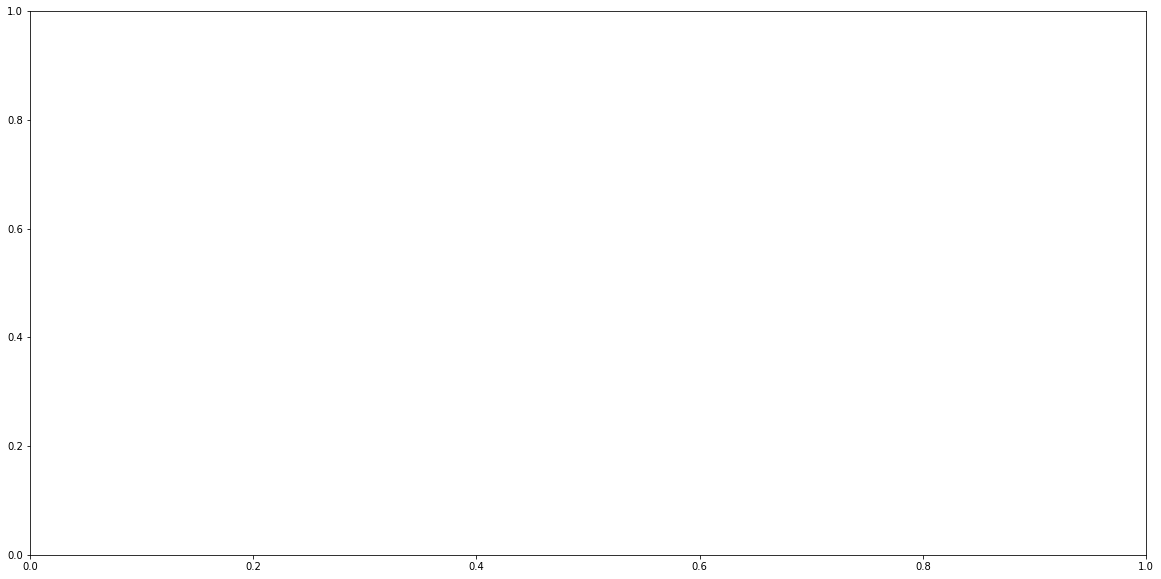

In [86]:
pca_plot(d,a1)

In [49]:
from sklearn.decomposition import pca
pca = PCA()
pca.fit(d)
d_1=pca.transform(d)
d_1

array([[ 0.33758549, -0.29863181,  0.31389811, ..., -0.03384931,
        -0.02230639, -0.03453107],
       [-0.60512556, -0.16046517,  0.19645844, ..., -0.05086943,
         0.06206479, -0.02019921],
       [ 0.15928673, -0.27265393, -0.21343549, ..., -0.09446715,
         0.03103273,  0.00415313],
       ...,
       [ 0.71951015,  0.4417559 , -0.48270052, ..., -0.05405036,
         0.06211387, -0.08997371],
       [-0.81798222, -0.51150025, -0.42216067, ..., -0.06391271,
        -0.06255961, -0.00877913],
       [-0.42891752, -0.39674272,  0.44380209, ...,  0.06099825,
         0.02654721, -0.03359578]])

In [57]:
np.array(a1[:,:]==[0,0,0]).sum(axis=1)==3

array([ True,  True,  True, ...,  True,  True, False])

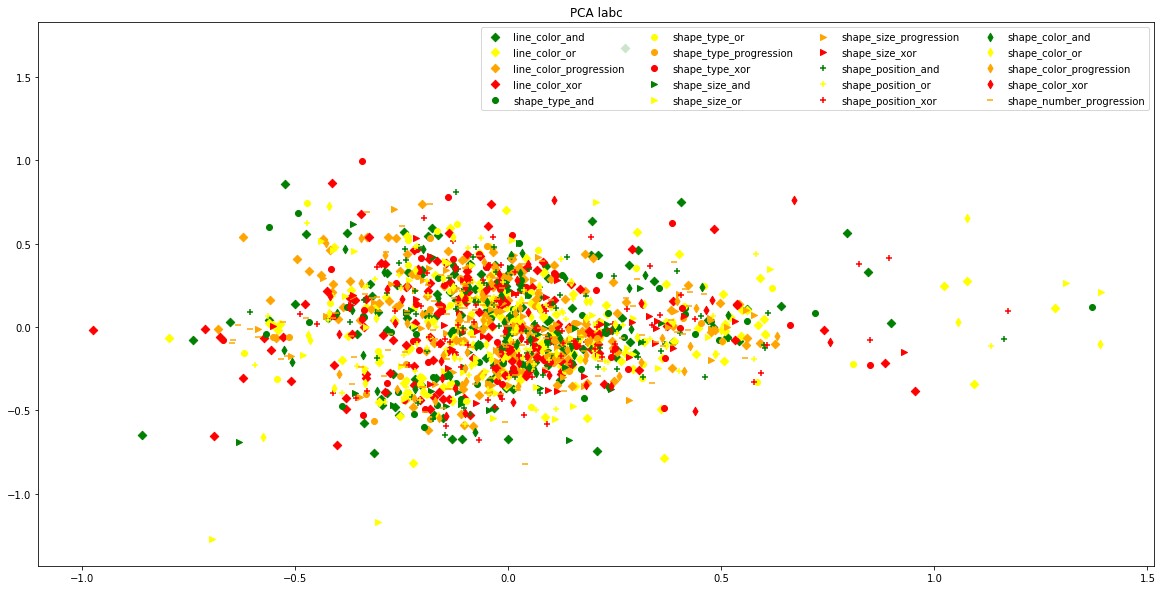

In [65]:
#labc
index1, value=np.where(t==0)
index2, value=np.where(t==1)
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(d)
d_1=pca.transform(d)
# pca.fit(d[index2])
# d_2=pca.transform(d[index2])
from matplotlib import pyplot as plt
#plt.subplot(1,2,1)
plt.figure(figsize=[20,10])
for i in range (1,8):
    for j in range (1,8):
        for r in range (1,5):
            if i==1:
                l1='type'
            if i==2:
                l1='size'
            if i==3:
                l1='position'
            if i==4:
                l1='color'
            if i==5:
                l1='number'
            if i==6:
                l1='line'
            if i==7:
                l1='shape'
            if j==1:
                l2='type'
                if i==6:
                    m='.'
                if i==7:
                    m='o'
            if j==2:
                l2='size'
                if i==6:
                    m='v'
                if i==7:
                    m='>'
            if j==3:
                l2='position'
                if i==6:
                    m='x'
                if i==7:
                    m='+'
            if j==4:
                l2='color'
                if i==6:
                    m='D'
                if i==7:
                    m='d'
            if j==5:
                l2='number'
                if i==6:
                    m='|'
                if i==7:
                    m='_'
            if j==6:
                l2='line'
                if i==6:
                    m='H'
                if i==7:
                    m='h'
            if j==7:
                l2='shape'
                if i==6:
                    m='1'
                if i==7:
                    m='2'
            if r==1:
                l3='and'
                c='green'
            if r==2:
                l3='or'
                c='yellow'
            if r==3:
                l3='progression'
                c='orange'
            if r==4:
                l3='xor'
                c='red'
            l=str(l1)+'_'+str(l2)+'_'+str(l3)
            f=((a1[index1,:]==[i,j,r]).sum(axis=1)==3)            
            if f.sum()>0:
                plt.scatter(d_1[:,0][(a1[index2,:]==[i,j,r]).sum(axis=1)==3],d_1[:,1][(a1[index2,:]==[i,j,r]).sum(axis=1)==3],label=l,marker=m,color=c)
plt.legend(loc=1, ncol=4)
plt.title('PCA labc')
plt.show()



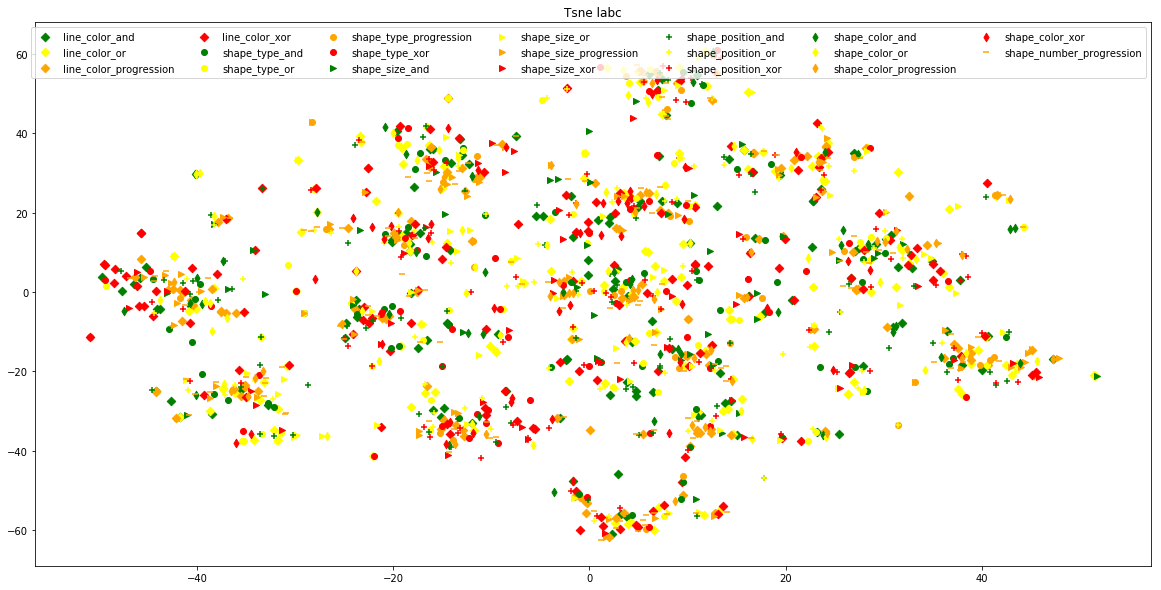

In [68]:
#labc
index1, value=np.where(t==0)
index2, value=np.where(t==1)
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne.fit(d)
d_1=tsne.fit_transform(d)
# tsne.fit(d[index2])
# d_4=tsne.fit_transform(d)

from matplotlib import pyplot as plt
#plt.subplot(1,2,1)
plt.figure(figsize=[20,10])
#plt.subplot(1,2,1)
for i in range (1,8):
    for j in range (1,8):
        for r in range (1,5):
            if i==1:
                l1='type'
            if i==2:
                l1='size'
            if i==3:
                l1='position'
            if i==4:
                l1='color'
            if i==5:
                l1='number'
            if i==6:
                l1='line'
            if i==7:
                l1='shape'
            if j==1:
                l2='type'
                if i==6:
                    m='.'
                if i==7:
                    m='o'
            if j==2:
                l2='size'
                if i==6:
                    m='v'
                if i==7:
                    m='>'
            if j==3:
                l2='position'
                if i==6:
                    m='x'
                if i==7:
                    m='+'
            if j==4:
                l2='color'
                if i==6:
                    m='D'
                if i==7:
                    m='d'
            if j==5:
                l2='number'
                if i==6:
                    m='|'
                if i==7:
                    m='_'
            if j==6:
                l2='line'
                if i==6:
                    m='H'
                if i==7:
                    m='h'
            if j==7:
                l2='shape'
                if i==6:
                    m='1'
                if i==7:
                    m='2'
            if r==1:
                l3='and'
                c='green'
            if r==2:
                l3='or'
                c='yellow'
            if r==3:
                l3='progression'
                c='orange'
            if r==4:
                l3='xor'
                c='red'
            l=str(l1)+'_'+str(l2)+'_'+str(l3)
            f=((a1[index1,:]==[i,j,r]).sum(axis=1)==3)            
            if f.sum()>0:
                plt.scatter(d_1[:,0][(a1[index2,:]==[i,j,r]).sum(axis=1)==3],d_1[:,1][(a1[index2,:]==[i,j,r]).sum(axis=1)==3],label=l,marker=m,color=c)
plt.legend(loc=1, ncol=7)
plt.title('Tsne labc')
plt.show()

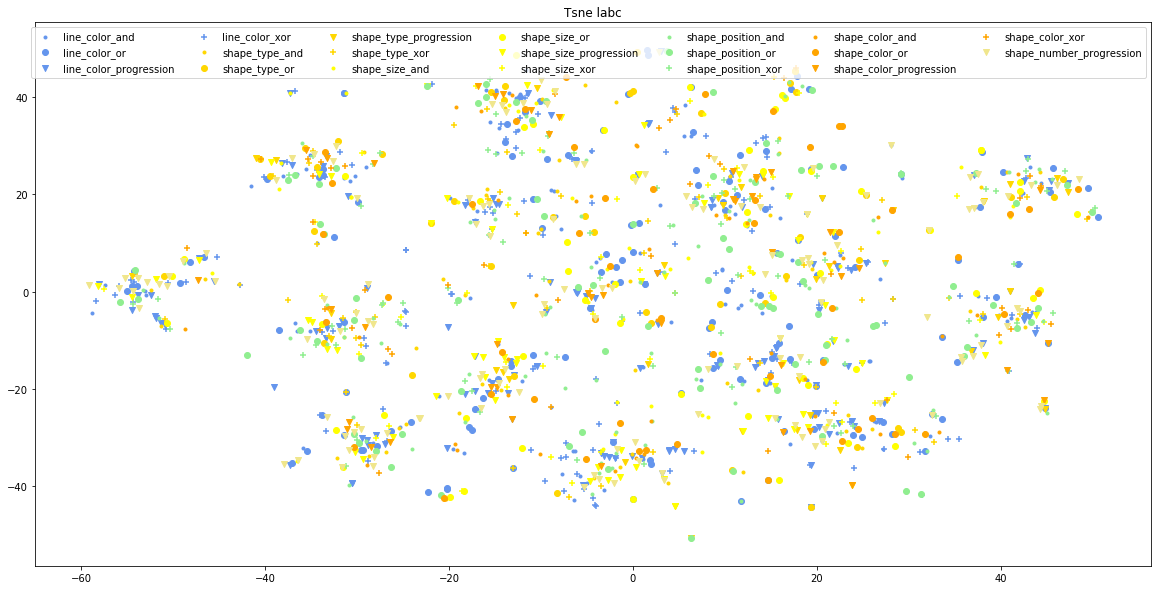

In [67]:
# #labc
# index1, value=np.where(t==0)
# index2, value=np.where(t==1)
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2)
# tsne.fit(d)
# d_1=tsne.fit_transform(d)
# # tsne.fit(d[index2])
# # d_4=tsne.fit_transform(d)

# from matplotlib import pyplot as plt
# #plt.subplot(1,2,1)
# plt.figure(figsize=[20,10])
# #plt.subplot(1,2,1)
# for i in range (1,8):
#     for j in range (1,8):
#         for r in range (1,5):
#             if i==1:
#                 l1='type'
#             if i==2:
#                 l1='size'
#             if i==3:
#                 l1='position'
#             if i==4:
#                 l1='color'
#             if i==5:
#                 l1='number'
#             if i==6:
#                 l1='line'
#             if i==7:
#                 l1='shape'
#             if j==1:
#                 l2='type'
#                 if i==6:
#                     c='blueviolet'
#                 if i==7:
#                     c='gold'
#             if j==2:
#                 l2='size'
#                 if i==6:
#                     c='blue'
#                 if i==7:
#                     c='yellow'
#             if j==3:
#                 l2='position'
#                 if i==6:
#                     c='navy'
#                 if i==7:
#                     c='lightgreen'
#             if j==4:
#                 l2='color'
#                 if i==6:
#                     c='cornflowerblue'
#                 if i==7:
#                     c='orange'
#             if j==5:
#                 l2='number'
#                 if i==6:
#                     c='lavender'
#                 if i==7:
#                     c='khaki'
#             if j==6:
#                 l2='line'
#                 if i==6:
#                     c='slateblue'
#                 if i==7:
#                     c='cornsilk'
#             if j==7:
#                 l2='shape'
#                 if i==6:
#                     c='purple'
#                 if i==7:
#                     c='tan'
#             if r==1:
#                 l3='and'
#                 m='.'
#             if r==2:
#                 l3='or'
#                 m='o'
#             if r==3:
#                 l3='progression'
#                 m='v'
#             if r==4:
#                 l3='xor'
#                 m='+'
#             l=str(l1)+'_'+str(l2)+'_'+str(l3)
#             f=((a1[index1,:]==[i,j,r]).sum(axis=1)==3)            
#             if f.sum()>0:
#                 plt.scatter(d_1[:,0][(a1[index2,:]==[i,j,r]).sum(axis=1)==3],d_1[:,1][(a1[index2,:]==[i,j,r]).sum(axis=1)==3],label=l,marker=m,color=c)
# plt.legend(loc=1, ncol=7)
# plt.title('Tsne labc')
# plt.show()


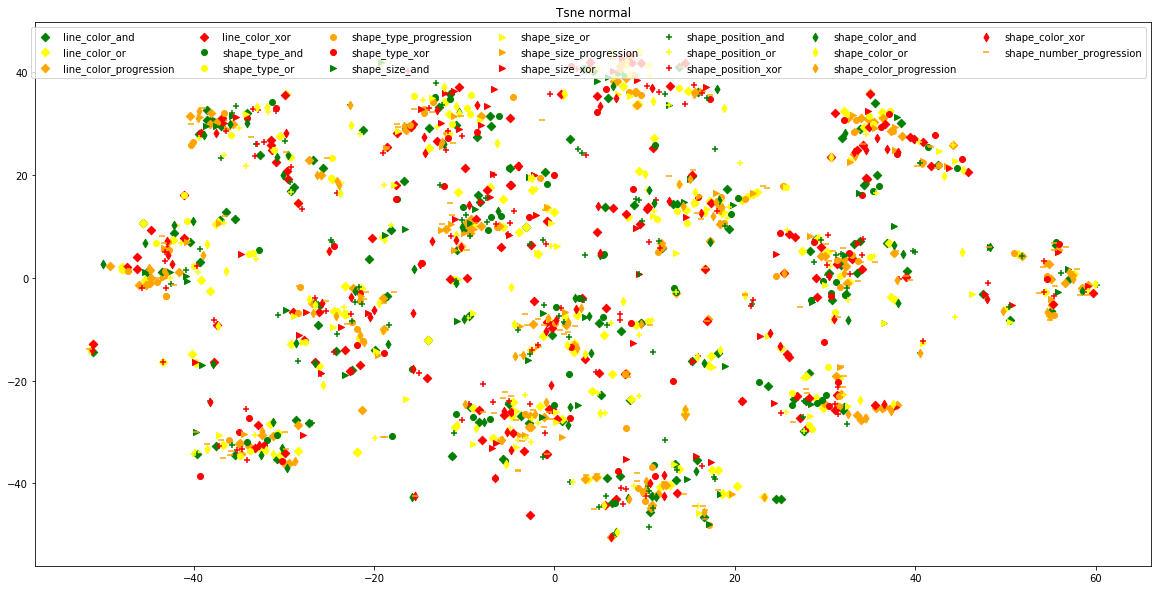

In [73]:
#normal
index1, value=np.where(t==0)
index2, value=np.where(t==1)
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne.fit(d)
d_1=tsne.fit_transform(d)
# tsne.fit(d[index2])
# d_4=tsne.fit_transform(d[index2])

from matplotlib import pyplot as plt
#plt.subplot(1,2,1)
plt.figure(figsize=[20,10])
#plt.subplot(1,2,1)
for i in range (1,8):
    for j in range (1,8):
        for r in range (1,5):
            if i==1:
                l1='type'
            if i==2:
                l1='size'
            if i==3:
                l1='position'
            if i==4:
                l1='color'
            if i==5:
                l1='number'
            if i==6:
                l1='line'
            if i==7:
                l1='shape'
            if j==1:
                l2='type'
                if i==6:
                    m='.'
                if i==7:
                    m='o'
            if j==2:
                l2='size'
                if i==6:
                    m='v'
                if i==7:
                    m='>'
            if j==3:
                l2='position'
                if i==6:
                    m='x'
                if i==7:
                    m='+'
            if j==4:
                l2='color'
                if i==6:
                    m='D'
                if i==7:
                    m='d'
            if j==5:
                l2='number'
                if i==6:
                    m='|'
                if i==7:
                    m='_'
            if j==6:
                l2='line'
                if i==6:
                    m='H'
                if i==7:
                    m='h'
            if j==7:
                l2='shape'
                if i==6:
                    m='1'
                if i==7:
                    m='2'
            if r==1:
                l3='and'
                c='green'
            if r==2:
                l3='or'
                c='yellow'
            if r==3:
                l3='progression'
                c='orange'
            if r==4:
                l3='xor'
                c='red'
            l=str(l1)+'_'+str(l2)+'_'+str(l3)
            f=((a1[index1,:]==[i,j,r]).sum(axis=1)==3)            
            if f.sum()>0:
                plt.scatter(d_1[:,0][(a1[index1,:]==[i,j,r]).sum(axis=1)==3],d_1[:,1][(a1[index1,:]==[i,j,r]).sum(axis=1)==3],label=l,marker=m,color=c)
plt.legend(loc=1, ncol=7)
plt.title('Tsne normal')
plt.show()



In [ ]:
#normal
index1, value=np.where(t==0)
index2, value=np.where(t==1)
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne.fit(d)
d_1=tsne.fit_transform(d)
# tsne.fit(d[index2])
# d_4=tsne.fit_transform(d[index2])

from matplotlib import pyplot as plt
#plt.subplot(1,2,1)
plt.figure(figsize=[20,10])
#plt.subplot(1,2,1)
for i in range (1,8):
    for j in range (1,8):
        for r in range (1,5):
            if i==1:
                l1='type'
            if i==2:
                l1='size'
            if i==3:
                l1='position'
            if i==4:
                l1='color'
            if i==5:
                l1='number'
            if i==6:
                l1='line'
            if i==7:
                l1='shape'
            if j==1:
                l2='type'
                if i==6:
                    c='blueviolet'
                if i==7:
                    c='gold'
            if j==2:
                l2='size'
                if i==6:
                    c='blue'
                if i==7:
                    c='yellow'
            if j==3:
                l2='position'
                if i==6:
                    c='navy'
                if i==7:
                    c='lightgreen'
            if j==4:
                l2='color'
                if i==6:
                    c='cornflowerblue'
                if i==7:
                    c='orange'
            if j==5:
                l2='number'
                if i==6:
                    c='lavender'
                if i==7:
                    c='khaki'
            if j==6:
                l2='line'
                if i==6:
                    c='slateblue'
                if i==7:
                    c='cornsilk'
            if j==7:
                l2='shape'
                if i==6:
                    c='purple'
                if i==7:
                    c='tan'
            if r==1:
                l3='and'
                m='.'
            if r==2:
                l3='or'
                m='o'
            if r==3:
                l3='progression'
                m='v'
            if r==4:
                l3='xor'
                m='+'
            l=str(l1)+'_'+str(l2)+'_'+str(l3)
            f=((a1[index1,:]==[i,j,r]).sum(axis=1)==3)            
            if f.sum()>0:
                plt.scatter(d_1[:,0][(a1[index1,:]==[i,j,r]).sum(axis=1)==3],d_1[:,1][(a1[index1,:]==[i,j,r]).sum(axis=1)==3],label=l,marker=m,color=c)
plt.legend(loc=1, ncol=7)
plt.title('Tsne normal')
plt.show()



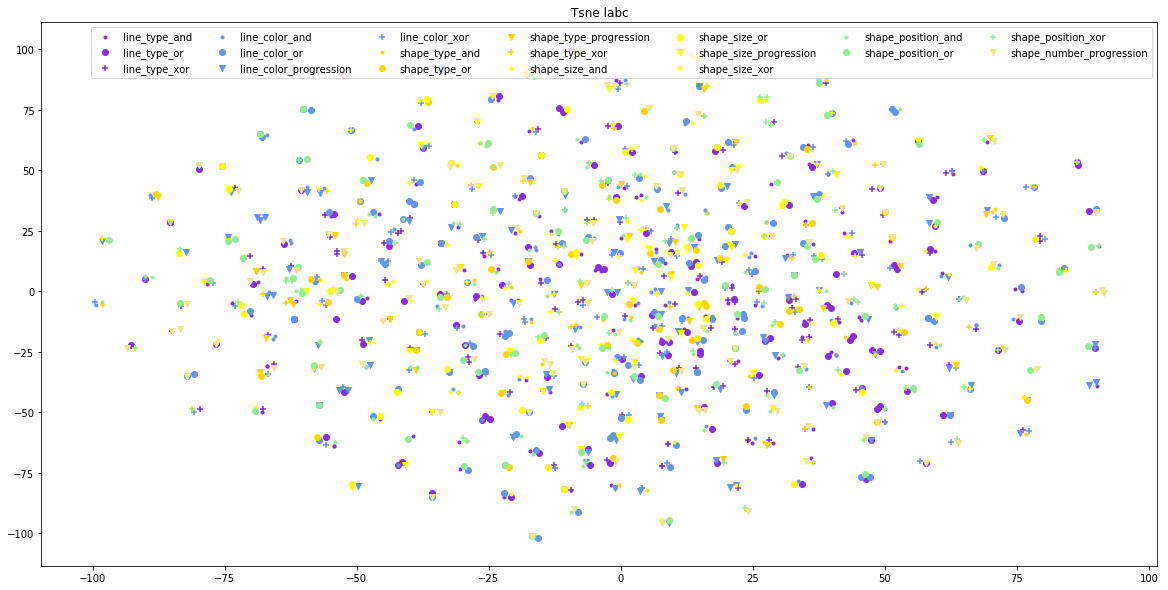

In [22]:
# plt.figure(figsize=[20,10])
# for i in range (1,8):
#     for j in range (1,8):
#         for r in range (1,5):
#             if i==1:
#                 l1='type'
#             if i==2:
#                 l1='size'
#             if i==3:
#                 l1='position'
#             if i==4:
#                 l1='color'
#             if i==5:
#                 l1='number'
#             if i==6:
#                 l1='line'
#             if i==7:
#                 l1='shape'
#             if j==1:
#                 l2='type'
#                 if i==6:
#                     c='blueviolet'
#                 if i==7:
#                     c='gold'
#             if j==2:
#                 l2='size'
#                 if i==6:
#                     c='blue'
#                 if i==7:
#                     c='yellow'
#             if j==3:
#                 l2='position'
#                 if i==6:
#                     c='navy'
#                 if i==7:
#                     c='lightgreen'
#             if j==4:
#                 l2='color'
#                 if i==6:
#                     c='cornflowerblue'
#                 if i==7:
#                     c='orange'
#             if j==5:
#                 l2='number'
#                 if i==6:
#                     c='lavender'
#                 if i==7:
#                     c='khaki'
#             if j==6:
#                 l2='line'
#                 if i==6:
#                     c='slateblue'
#                 if i==7:
#                     c='cornsilk'
#             if j==7:
#                 l2='shape'
#                 if i==6:
#                     c='purple'
#                 if i==7:
#                     c='tan'
#             if r==1:
#                 l3='and'
#                 m='.'
#             if r==2:
#                 l3='or'
#                 m='o'
#             if r==3:
#                 l3='progression'
#                 m='v'
#             if r==4:
#                 l3='xor'
#                 m='+'
#             l=str(l1)+'_'+str(l2)+'_'+str(l3)
#             f=((a1[index1,:]==[i,j,r]).sum(axis=1)==3)            
#             if f.sum()>0:
#                 plt.scatter(d_4[:,0][(a1[index1,:]==[i,j,r]).sum(axis=1)==3],d_4[:,1][(a1[index1,:]==[i,j,r]).sum(axis=1)==3],label=l,marker=m,color=c)
# plt.legend(loc=1, ncol=7)
# plt.title('Tsne labc')
# plt.show()

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
km=KMeans(n_clusters=4)
km.fit(d_1)
p1=km.predict(d_1)
s1=adjusted_rand_score(p1,a1[index1,2])
km=KMeans(n_clusters=5)
km.fit(d_1)
p1=km.predict(d_1)
s2=adjusted_rand_score(p1,a1[index1,1])
km=KMeans(n_clusters=4)
km.fit(d_2)
p1=km.predict(d_2)
s3=adjusted_rand_score(p1,a1[index2,2])
km=KMeans(n_clusters=5)
km.fit(d_2)
p1=km.predict(d_2)
s4=adjusted_rand_score(p1,a1[index2,1])
print(s1,s2,s3,s4)

-0.0005917852738594732 0.00016711203422477893 0.0007496532657161368 -8.690285314330341e-05
